# - The project :: Loan-Prediction-Project
*****************************************************************
<img src="images/loan.jpg" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/process.jpg" /> 


* Domain-Knowledge ::
    * we are going to work on binary classification problem, where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information . we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem ..
    * This is a binary classification problem where we need to predict whether or not to approve a loan based on the past information of the person.
        
<img src="images/project.png" />

    


# overview about How ML Solve That Problem of classifier :: 
***********************************
        
<img src="images/process.png" />

* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("loan-data.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

* from thae result above we can see that ::
*********************************************************
* We have 614  record of data.
* we have 13  features related Income.
* Our-Target Loan_Status that we will Prediction it use ML Models.

*******************************************************
# Features of Income data :
*******************************************************

* Categorical Attributes :::
************************************

* Workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * Individual work category
* Education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * Individual's highest education degree
* Marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * Individual marital status
* Occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * Individual's occupation
* Relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * Individual's relation in a family
* Race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
* Sex: (categorical) Female, Male.
* Native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * Individual's native country
  
*******************************
    
* Continuous Attributes ::
*************************************
   * age: continuous.
        * Age of an individual
   * Education-num: number of education year, continuous.
        * Individual's year of receiving education
   * fnlwgt: final weight, continuous.
        * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
   * capital-gain: continuous.
   * capital-loss: continuous.
   * hours-per-week: continuous.
        *Individual's working hour per week

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

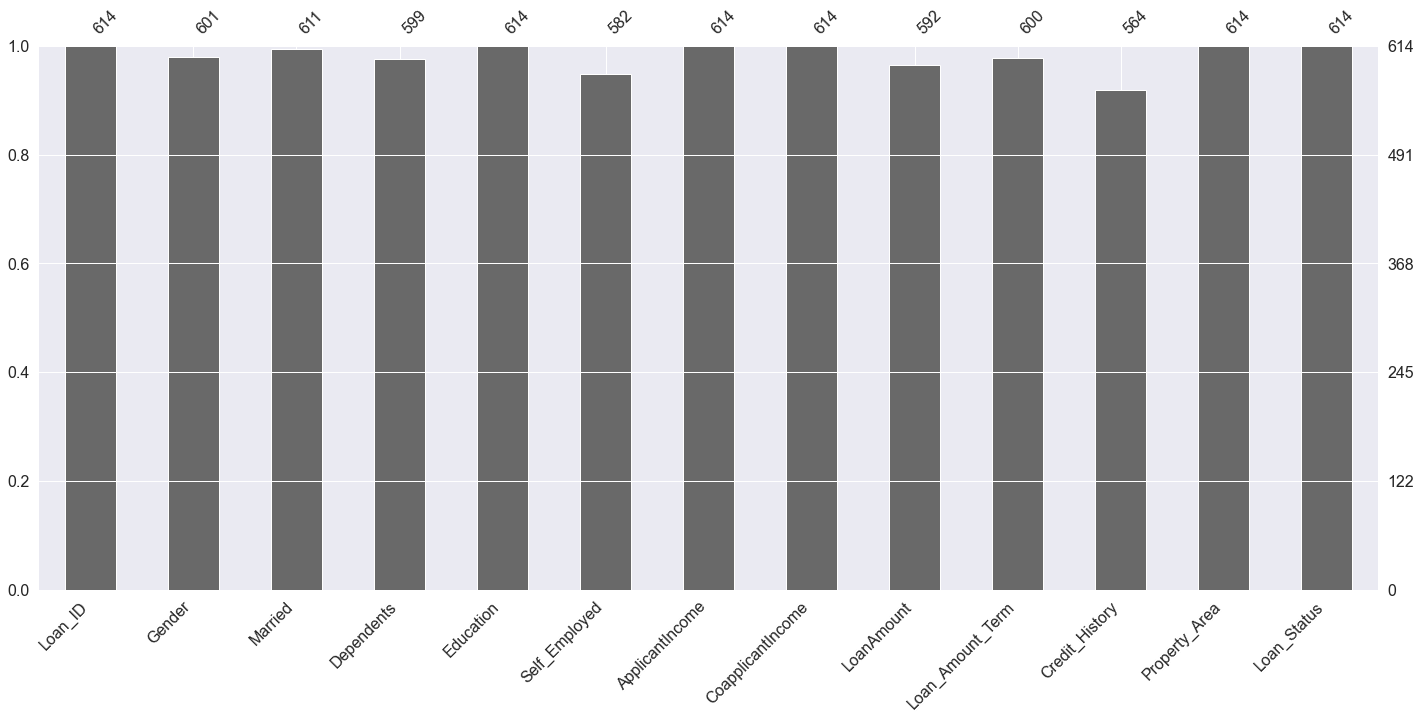

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

* From the result above we can see that data include missing data values so that we will fill that missing using mean , median or mode based on that feature dtype.

In [8]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Loan_ID)

The Col _ (Loan_ID) _Unique_values :: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 '

In [9]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [10]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001813   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422

In [11]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
# check data include duplicates record or not
df.duplicated().sum()

0

* From the result above data not include duplicaties.

In [13]:
# Checking dtypes of dataset.
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* Wrangling and Mainplluting data.

In [14]:
# Get The Record Of the Clients who max ApplicantIncome ::
df[df["ApplicantIncome"] == df["ApplicantIncome"].max()]

Loan_ID Gender Married Dependents Education Self_Employed  \
409  LP002317   Male     Yes         3+  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
409            81000                0.0       360.0             360.0   

     Credit_History Property_Area Loan_Status  
409             0.0         Rural           N

In [15]:
# Get The Record of the Min ApplicantIncome ::
df[df["ApplicantIncome"] == df["ApplicantIncome"].min()]

Loan_ID Gender Married Dependents Education Self_Employed  \
216  LP001722   Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
216              150             1800.0       135.0             360.0   

     Credit_History Property_Area Loan_Status  
216             1.0         Rural           N

In [16]:
# Get The Record Of the Clients who max CoapplicantIncome ::
df[df["CoapplicantIncome"] == df["CoapplicantIncome"].max()]

Loan_ID  Gender Married Dependents Education Self_Employed  \
600  LP002949  Female      No         3+  Graduate           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
600              416            41667.0       350.0             180.0   

     Credit_History Property_Area Loan_Status  
600             NaN         Urban           N

In [17]:
# Get The Record of the Min CoapplicantIncome ::
df[df["CoapplicantIncome"] == df["CoapplicantIncome"].min()]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
4    LP001008    Male      No          0      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
604  LP002959  Female     Yes          1      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
2               3000                0.0        66.0             360.0   
4               6000                0.0       141.0             360.0   
15              4950                0.0       125.0             360.0   
16              3596                0.0       100.0             240.0   
..               ...                ...         ...               ...   
604            12000                0.0       496.0             360.0   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
2               1.0         Urban           Y  
4               1.0         Urban           Y  
15              1.0         Urban           Y  
16              NaN         Urban           Y  
..              ...           ...         ...  
604             1.0     Semiurban           Y  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[273 rows x 13 columns]

In [18]:
# Get The Record Of the Clients who max LoanAmount ::
df[df["LoanAmount"] == df["LoanAmount"].max()]

Loan_ID Gender Married Dependents Education Self_Employed  \
171  LP001585    NaN     Yes         3+  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
171            51763                0.0       700.0             300.0   

     Credit_History Property_Area Loan_Status  
171             1.0         Urban           Y

In [19]:
# Get The Record of the Min LoanAmount ::
df[df["LoanAmount"] == df["LoanAmount"].min()]

Loan_ID  Gender Married Dependents Education Self_Employed  \
568  LP002840  Female      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568             2378                0.0         9.0             360.0   

     Credit_History Property_Area Loan_Status  
568             1.0         Urban           N

In [20]:
# Get The Record Of the Clients who max Loan_Amount_Term ::
df[df["Loan_Amount_Term"] == df["Loan_Amount_Term"].max()]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
75   LP001255    Male      No          0      Graduate            No   
109  LP001384    Male     Yes         3+  Not Graduate            No   
130  LP001469    Male      No          0      Graduate           Yes   
168  LP001579    Male      No          0      Graduate            No   
179  LP001630    Male      No          0  Not Graduate            No   
228  LP001760    Male     NaN        NaN      Graduate            No   
248  LP001824    Male     Yes          1      Graduate            No   
293  LP001945  Female      No        NaN      Graduate            No   
298  LP001955  Female      No          0      Graduate            No   
358  LP002158    Male     Yes          0  Not Graduate            No   
366  LP002187    Male      No          0      Graduate            No   
378  LP002224    Male      No          0      Graduate            No   
500  LP002603  Female      No          0      Graduate            No   
516  LP002670  Female     Yes          2      Graduate            No   
573  LP002862    Male     Yes          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
75              3750                0.0       113.0             480.0   
109             2071              754.0        94.0             480.0   
130            20166                0.0       650.0             480.0   
168             2237                0.0        63.0             480.0   
179             2333             1451.0       102.0             480.0   
228             4758                0.0       158.0             480.0   
248             2882             1843.0       123.0             480.0   
293             5417                0.0       143.0             480.0   
298             5000             2541.0       151.0             480.0   
358             3000             1666.0       100.0             480.0   
366             2500                0.0        96.0             480.0   
378             3069                0.0        71.0             480.0   
500              645             3683.0       113.0             480.0   
516             2031             1632.0       113.0             480.0   
573             6125             1625.0       187.0             480.0   

     Credit_History Property_Area Loan_Status  
75              1.0         Urban           N  
109             1.0     Semiurban           Y  
130             NaN         Urban           Y  
168             0.0     Semiurban           N  
179             0.0         Urban           N  
228             1.0     Semiurban           Y  
248             1.0     Semiurban           Y  
293             0.0         Urban           N  
298             1.0         Rural           N  
358             0.0         Urban           N  
366             1.0     Semiurban           N  
378             1.0         Urban           N  
500             1.0         Rural           Y  
516             1.0     Semiurban           Y  
573             1.0     Semiurban           N

In [21]:
# Get The Record of the Min Loan_Amount_Term ::
df[df["Loan_Amount_Term"] == df["Loan_Amount_Term"].min()]

Loan_ID Gender Married Dependents Education Self_Employed  \
497  LP002588   Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
497             4625             2857.0       111.0              12.0   

     Credit_History Property_Area Loan_Status  
497             NaN         Urban           Y

In [22]:
# Get The Record Of the Clients who max Credit_History ::
df[df["Credit_History"] == df["Credit_History"].max()]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
608             3232             1950.0       108.0             360.0   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
608             1.0         Rural           Y  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  

[475 rows x 13 columns]

In [23]:
# Get The Record of the Min Credit_History ::
df[df["Credit_History"] == df["Credit_History"].min()]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
7    LP001014    Male     Yes         3+      Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
20   LP001043    Male     Yes          0  Not Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050     NaN     Yes          2  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
576  LP002872     NaN     Yes          0      Graduate            No   
584  LP002911    Male     Yes          1      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
7               3036             2504.0       158.0             360.0   
17              3510                0.0        76.0             360.0   
20              7660                0.0       104.0             360.0   
22              2600             1911.0       116.0             360.0   
23              3365             1917.0       112.0             360.0   
..               ...                ...         ...               ...   
576             3087             2210.0       136.0             360.0   
584             2787             1917.0       146.0             360.0   
589             2726                0.0       106.0             360.0   
597             2987                0.0        88.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
7               0.0     Semiurban           N  
17              0.0         Urban           N  
20              0.0         Urban           N  
22              0.0     Semiurban           N  
23              0.0         Rural           N  
..              ...           ...         ...  
576             0.0     Semiurban           N  
584             0.0         Rural           N  
589             0.0     Semiurban           N  
597             0.0     Semiurban           N  
613             0.0     Semiurban           N  

[89 rows x 13 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
# grouped data ased on Gender feature and get col describtion ::
df.groupby("Gender").describe().transpose()

Gender                         Female          Male
ApplicantIncome   count    112.000000    489.000000
                  mean    4643.473214   5446.460123
                  std     3585.381488   6185.789262
                  min      210.000000    150.000000
                  25%     2661.500000   2917.000000
                  50%     3583.000000   3865.000000
                  75%     4606.500000   5923.000000
                  max    19484.000000  81000.000000
CoapplicantIncome count    112.000000    489.000000
                  mean    1108.008929   1742.932352
                  std     4094.595514   2606.507054
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000   1430.000000
                  75%     1635.000000   2436.000000
                  max    41667.000000  33837.000000
LoanAmount        count    109.000000    470.000000
                  mean     126.697248    149.265957
                  std       79.286460     82.810851
                  min        9.000000     17.000000
                  25%       88.000000    104.000000
                  50%      113.000000    130.000000
                  75%      138.000000    175.000000
                  max      600.000000    650.000000
Loan_Amount_Term  count    109.000000    478.000000
                  mean     352.293578    339.665272
                  std       56.722081     67.089140
                  min       36.000000     12.000000
                  25%      360.000000    360.000000
                  50%      360.000000    360.000000
                  75%      360.000000    360.000000
                  max      480.000000    480.000000
Credit_History    count    101.000000    451.000000
                  mean       0.831683      0.847007
                  std        0.376013      0.360381
                  min        0.000000      0.000000
                  25%        1.000000      1.000000
                  50%        1.000000      1.000000
                  75%        1.000000      1.000000
                  max        1.000000      1.000000

In [26]:
# grouped data ased on Married feature and get col describtion ::
df.groupby("Married").describe().transpose()

Married                            No           Yes
ApplicantIncome   count    213.000000    398.000000
                  mean    4970.384977   5629.173367
                  std     4004.332801   6989.254425
                  min      416.000000    150.000000
                  25%     2917.000000   2817.500000
                  50%     3750.000000   3854.500000
                  75%     5417.000000   5820.500000
                  max    37719.000000  81000.000000
CoapplicantIncome count    213.000000    398.000000
                  mean    1316.558685   1794.632965
                  std     4097.418521   2039.962354
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000   1625.000000
                  75%     1783.000000   2464.000000
                  max    41667.000000  20000.000000
LoanAmount        count    206.000000    384.000000
                  mean     128.883495    155.750000
                  std       74.385981     89.934267
                  min        9.000000     17.000000
                  25%       88.000000    108.000000
                  50%      115.500000    132.000000
                  75%      144.750000    178.500000
                  max      650.000000    700.000000
Loan_Amount_Term  count    208.000000    389.000000
                  mean     351.115385    336.987147
                  std       60.398565     66.739163
                  min       36.000000     12.000000
                  25%      360.000000    360.000000
                  50%      360.000000    360.000000
                  75%      360.000000    360.000000
                  max      480.000000    480.000000
Credit_History    count    199.000000    362.000000
                  mean       0.839196      0.842541
                  std        0.368277      0.364737
                  min        0.000000      0.000000
                  25%        1.000000      1.000000
                  50%        1.000000      1.000000
                  75%        1.000000      1.000000
                  max        1.000000      1.000000

In [27]:
# grouped data ased on Dependents feature and get col describtion ::
df.groupby("Dependents").describe().transpose()

Dependents                          0             1             2  \
ApplicantIncome   count    345.000000    102.000000    101.000000   
                  mean    4917.423188   5962.274510   4926.782178   
                  std     5029.420772   5587.399149   3153.828577   
                  min      150.000000   1000.000000    210.000000   
                  25%     2600.000000   3054.500000   3153.000000   
                  50%     3598.000000   4051.500000   4006.000000   
                  75%     5417.000000   6556.000000   5819.000000   
                  max    63337.000000  37719.000000  17500.000000   
CoapplicantIncome count    345.000000    102.000000    101.000000   
                  mean    1623.696000   1426.235294   1687.245544   
                  std     2630.540915   1830.043127   2556.268525   
                  min        0.000000      0.000000      0.000000   
                  25%        0.000000      0.000000      0.000000   
                  50%     1330.000000   1219.500000   1387.000000   
                  75%     2417.000000   2072.750000   2000.000000   
                  max    33837.000000  10968.000000  20000.000000   
LoanAmount        count    334.000000     98.000000     98.000000   
                  mean     135.886228    158.622449    150.224490   
                  std       75.848072     95.097402     71.283018   
                  min        9.000000     26.000000     17.000000   
                  25%       96.500000    106.250000    108.250000   
                  50%      120.000000    139.000000    133.000000   
                  75%      155.000000    178.750000    186.500000   
                  max      650.000000    600.000000    480.000000   
Loan_Amount_Term  count    334.000000    101.000000    101.000000   
                  mean     348.107784    329.346535    340.871287   
                  std       57.954215     75.446993     64.914970   
                  min       12.000000     36.000000     84.000000   
                  25%      360.000000    360.000000    360.000000   
                  50%      360.000000    360.000000    360.000000   
                  75%      360.000000    360.000000    360.000000   
                  max      480.000000    480.000000    480.000000   
Credit_History    count    316.000000     90.000000     95.000000   
                  mean       0.857595      0.844444      0.852632   
                  std        0.350019      0.364464      0.356353   
                  min        0.000000      0.000000      0.000000   
                  25%        1.000000      1.000000      1.000000   
                  50%        1.000000      1.000000      1.000000   
                  75%        1.000000      1.000000      1.000000   
                  max        1.000000      1.000000      1.000000   

Dependents                         3+  
ApplicantIncome   count     51.000000  
                  mean    8581.215686  
                  std    13603.938611  
                  min      416.000000  
                  25%     3366.500000  
                  50%     4691.000000  
                  75%     6758.500000  
                  max    81000.000000  
CoapplicantIncome count     51.000000  
                  mean    2024.313725  
                  std     6050.789044  
                  min        0.000000  
                  25%        0.000000  
                  50%        0.000000  
                  75%     1902.000000  
                  max    41667.000000  
LoanAmount        count     49.000000  
                  mean     190.897959  
                  std      134.885329  
                  min       40.000000  
                  25%      100.000000  
                  50%      130.000000  
                  75%      255.000000  
                  max      700.000000  
Loan_Amount_Term  count     50.000000  
                  mean     325.200000  
                  std       79.571300  
                  min       60.000000  
          

In [28]:
# grouped data ased on Education feature and get col describtion ::
df.groupby("Education").describe().transpose()

Education                    Graduate  Not Graduate
ApplicantIncome   count    480.000000    134.000000
                  mean    5857.433333   3777.283582
                  std     6739.797954   2237.081586
                  min      150.000000    210.000000
                  25%     2998.750000   2583.000000
                  50%     4000.000000   3357.500000
                  75%     6068.750000   4333.000000
                  max    81000.000000  18165.000000
CoapplicantIncome count    480.000000    134.000000
                  mean    1717.474833   1276.544776
                  std     3230.965850   1310.343602
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%     1059.000000   1356.500000
                  75%     2337.000000   2028.250000
                  max    41667.000000   7101.000000
LoanAmount        count    465.000000    127.000000
                  mean     154.060215    118.409449
                  std       92.883366     39.773636
                  min        9.000000     25.000000
                  25%      103.000000     96.500000
                  50%      132.000000    115.000000
                  75%      176.000000    133.000000
                  max      700.000000    279.000000
Loan_Amount_Term  count    472.000000    128.000000
                  mean     344.669492    332.156250
                  std       61.299661     77.079613
                  min       12.000000     36.000000
                  25%      360.000000    360.000000
                  50%      360.000000    360.000000
                  75%      360.000000    360.000000
                  max      480.000000    480.000000
Credit_History    count    443.000000    121.000000
                  mean       0.857788      0.785124
                  std        0.349663      0.412444
                  min        0.000000      0.000000
                  25%        1.000000      1.000000
                  50%        1.000000      1.000000
                  75%        1.000000      1.000000
                  max        1.000000      1.000000

In [29]:
# grouped data ased on Self_Employed feature and get col describtion ::
df.groupby("Self_Employed").describe().transpose()

Self_Employed                      No           Yes
ApplicantIncome   count    500.000000     82.000000
                  mean    5049.748000   7380.817073
                  std     5682.895810   5883.564795
                  min      150.000000    674.000000
                  25%     2824.500000   3452.250000
                  50%     3705.500000   5809.000000
                  75%     5292.750000   9348.500000
                  max    81000.000000  39147.000000
CoapplicantIncome count    500.000000     82.000000
                  mean    1580.989840   1501.341463
                  std     2438.161181   2780.713676
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%     1293.500000      0.000000
                  75%     2303.000000   2164.500000
                  max    33837.000000  20000.000000
LoanAmount        count    482.000000     79.000000
                  mean     141.748963    172.000000
                  std       79.780919    108.634650
                  min        9.000000     25.000000
                  25%      100.000000    106.000000
                  50%      125.000000    150.000000
                  75%      161.750000    189.000000
                  max      700.000000    650.000000
Loan_Amount_Term  count    489.000000     80.000000
                  mean     343.263804    336.300000
                  std       64.696881     69.395290
                  min       12.000000     60.000000
                  25%      360.000000    360.000000
                  50%      360.000000    360.000000
                  75%      360.000000    360.000000
                  max      480.000000    480.000000
Credit_History    count    463.000000     75.000000
                  mean       0.835853      0.840000
                  std        0.370809      0.369075
                  min        0.000000      0.000000
                  25%        1.000000      1.000000
                  50%        1.000000      1.000000
                  75%        1.000000      1.000000
                  max        1.000000      1.000000

In [30]:
# grouped data ased on Loan_Status feature and get col describtion ::
df.groupby("Loan_Status").describe().transpose()

Loan_Status                         N             Y
ApplicantIncome   count    192.000000    422.000000
                  mean    5446.078125   5384.068720
                  std     6819.558528   5765.441615
                  min      150.000000    210.000000
                  25%     2885.000000   2877.500000
                  50%     3833.500000   3812.500000
                  75%     5861.250000   5771.500000
                  max    81000.000000  63337.000000
CoapplicantIncome count    192.000000    422.000000
                  mean    1877.807292   1504.516398
                  std     4384.060103   1924.754855
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%      268.000000   1239.500000
                  75%     2273.750000   2297.250000
                  max    41667.000000  20000.000000
LoanAmount        count    181.000000    411.000000
                  mean     151.220994    144.294404
                  std       85.862783     85.484607
                  min        9.000000     17.000000
                  25%      100.000000    100.000000
                  50%      129.000000    126.000000
                  75%      176.000000    161.000000
                  max      570.000000    700.000000
Loan_Amount_Term  count    186.000000    414.000000
                  mean     344.064516    341.072464
                  std       69.238921     63.247770
                  min       36.000000     12.000000
                  25%      360.000000    360.000000
                  50%      360.000000    360.000000
                  75%      360.000000    360.000000
                  max      480.000000    480.000000
Credit_History    count    179.000000    385.000000
                  mean       0.541899      0.981818
                  std        0.499639      0.133782
                  min        0.000000      0.000000
                  25%        0.000000      1.000000
                  50%        1.000000      1.000000
                  75%        1.000000      1.000000
                  max        1.000000      1.000000

In [31]:
df.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N

In [32]:
Pivot_T1 = pd.pivot_table(df , index = "Dependents" , columns = "Loan_Status" , values = "Loan_Amount_Term")
Pivot_T1

Loan_Status           N           Y
Dependents                         
0            353.359223  345.766234
1            318.857143  334.909091
2            352.800000  336.947368
3+           314.117647  330.909091

In [33]:
Pivot_T1 = pd.pivot_table(df , index = "CoapplicantIncome" , columns = "Loan_Status" , values = "Loan_Amount_Term")
Pivot_T1

Loan_Status                 N           Y
CoapplicantIncome                        
0.000000           350.451613  335.108571
16.120001                 NaN  360.000000
189.000000                NaN  360.000000
240.000000                NaN  360.000000
242.000000                NaN  360.000000
...                       ...         ...
10968.000000       360.000000         NaN
11300.000000       360.000000         NaN
20000.000000       360.000000  360.000000
33837.000000       360.000000         NaN
41667.000000       180.000000         NaN

[280 rows x 2 columns]

In [34]:
Pivot_T1 = pd.pivot_table(df , index = "Credit_History" , columns = "Loan_Status" , values = "Loan_Amount_Term")
Pivot_T1

Loan_Status              N           Y
Credit_History                        
0.0             345.000000  308.571429
1.0             343.051546  341.967568

In [35]:
Pivot_T1 = pd.pivot_table(df , index = "Dependents" , columns = "Loan_Status" , values = "LoanAmount")
Pivot_T1

Loan_Status           N           Y
Dependents                         
0            141.831683  133.309013
1            163.571429  155.873016
2            144.217391  152.066667
3+           199.687500  186.636364

In [36]:
Pivot_T1 = pd.pivot_table(df , index = "CoapplicantIncome" , columns = "Loan_Status" , values = "LoanAmount")
Pivot_T1

Loan_Status                 N           Y
CoapplicantIncome                        
0.000000           134.696629  150.401163
16.120001                 NaN   87.000000
189.000000                NaN  124.000000
240.000000                NaN  253.000000
242.000000                NaN  108.000000
...                       ...         ...
10968.000000       349.000000         NaN
11300.000000       495.000000         NaN
20000.000000       239.000000  103.000000
33837.000000        90.000000         NaN
41667.000000       350.000000         NaN

[278 rows x 2 columns]

In [37]:
Pivot_T1 = pd.pivot_table(df , index = "Credit_History" , columns = "Loan_Status" , values = "LoanAmount")
Pivot_T1

Loan_Status              N           Y
Credit_History                        
0.0             141.371795  206.285714
1.0             155.604396  142.103542

In [38]:
Con_Matrix = df.corr()
Con_Matrix

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

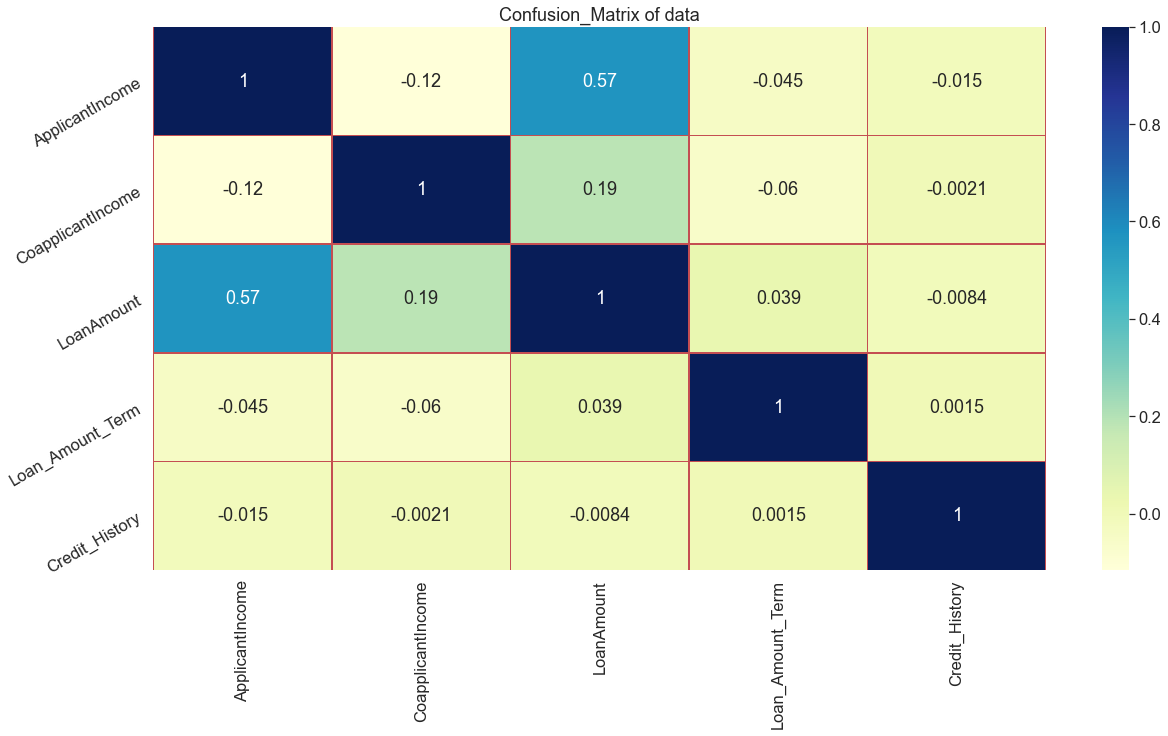

In [39]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
# To Present species of Gender ::
Genders = df["Gender"].value_counts()
Genders

Male      489
Female    112
Name: Gender, dtype: int64

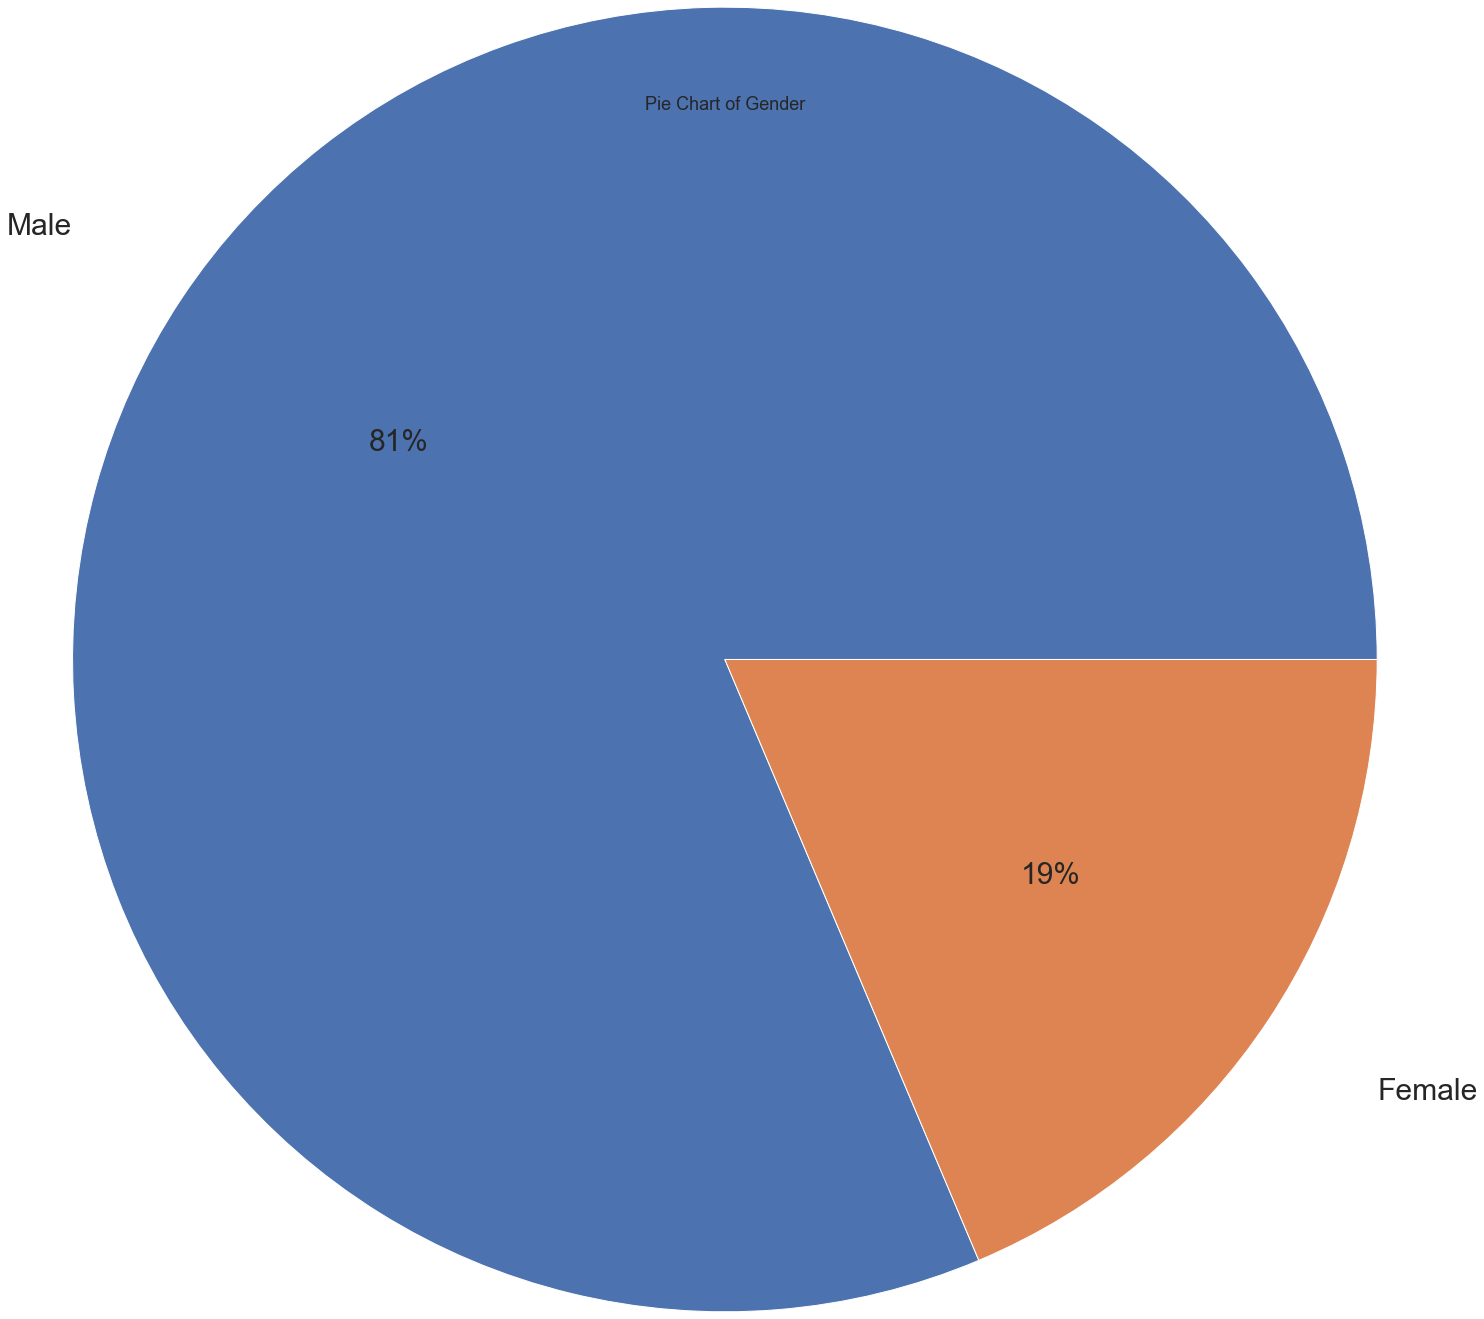

In [42]:
# Visualize Comparing Gender ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
Genders.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Gender")
plt.show()

In [43]:
# To Present species of Married ::
Marrieds = df["Married"].value_counts()
Marrieds

Yes    398
No     213
Name: Married, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Married')

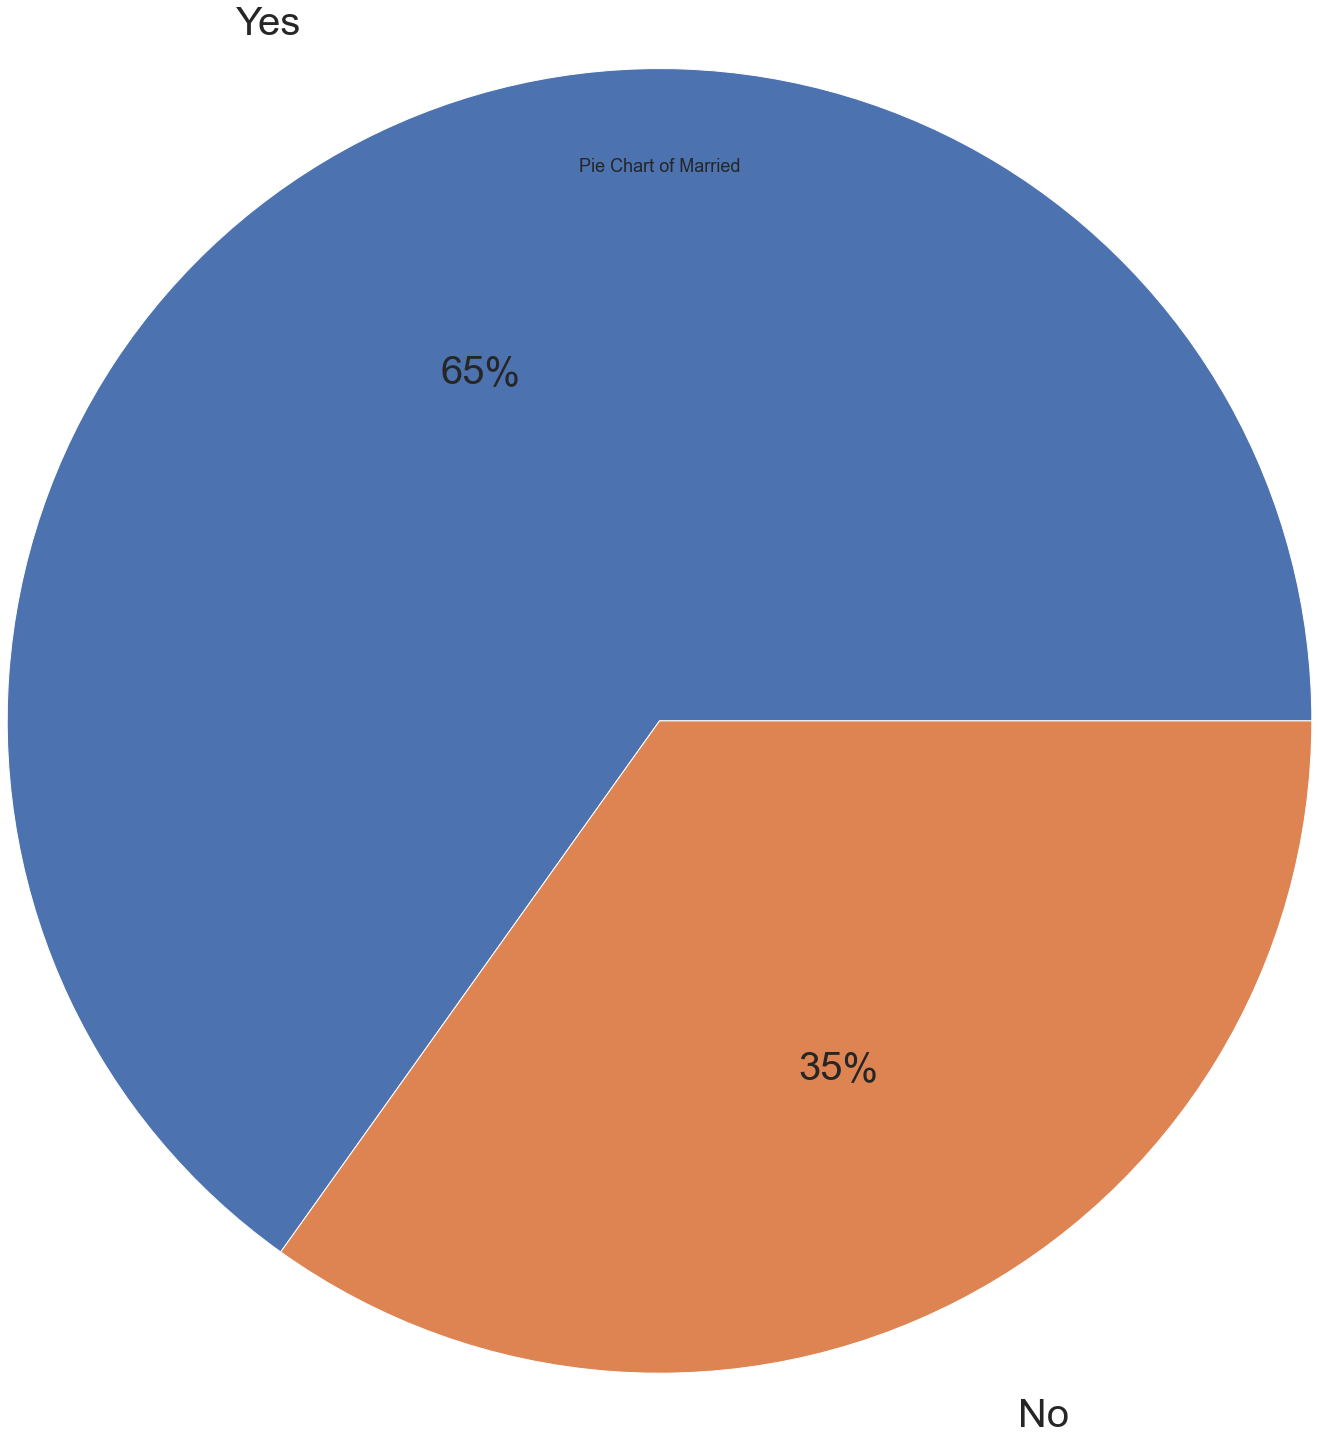

In [44]:
Marrieds.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Married")

In [45]:
# To Present species of Dependents ::
Dependentss = df["Dependents"].value_counts()
Dependentss

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Dependents')

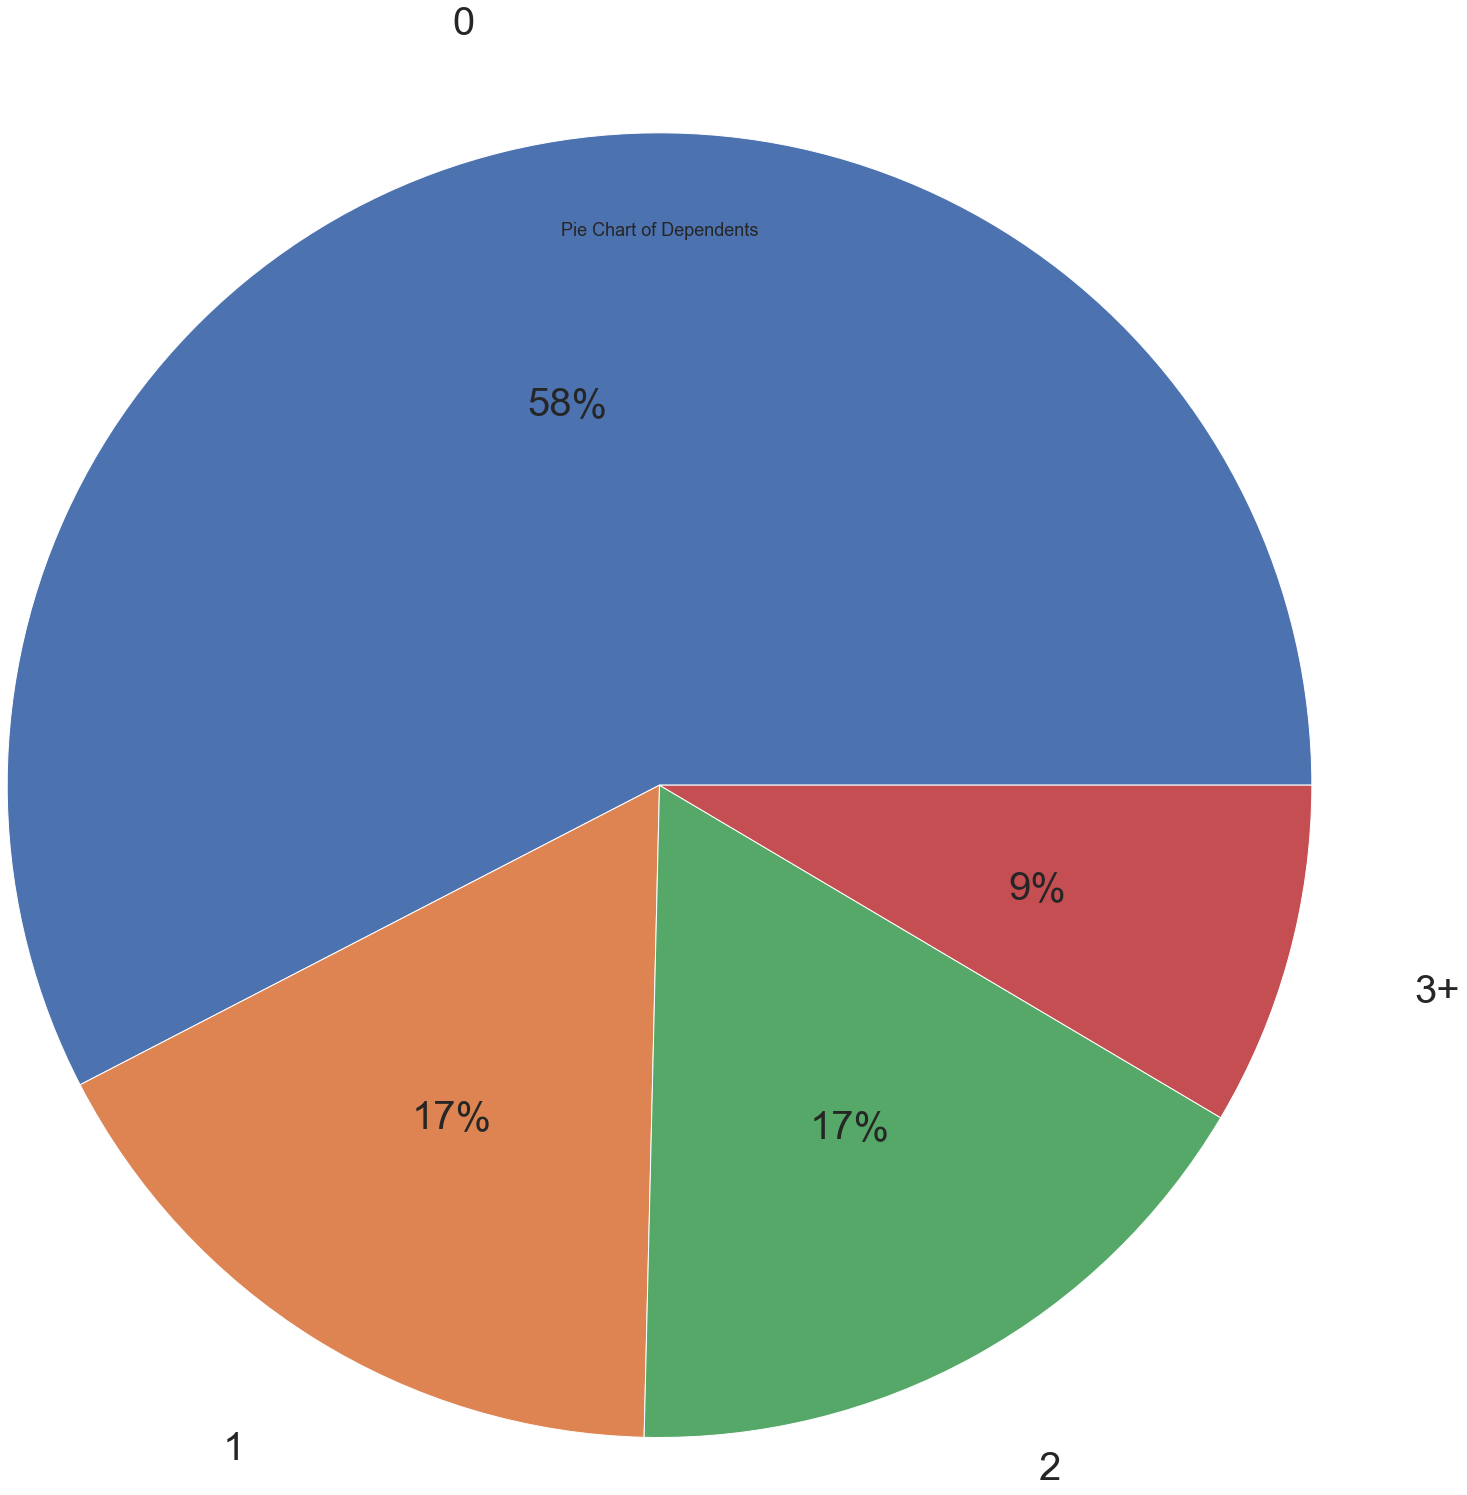

In [46]:
Dependentss.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Dependents")

In [47]:
# To Present species of Education ::
Educations = df["Education"].value_counts()
Educations

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Education')

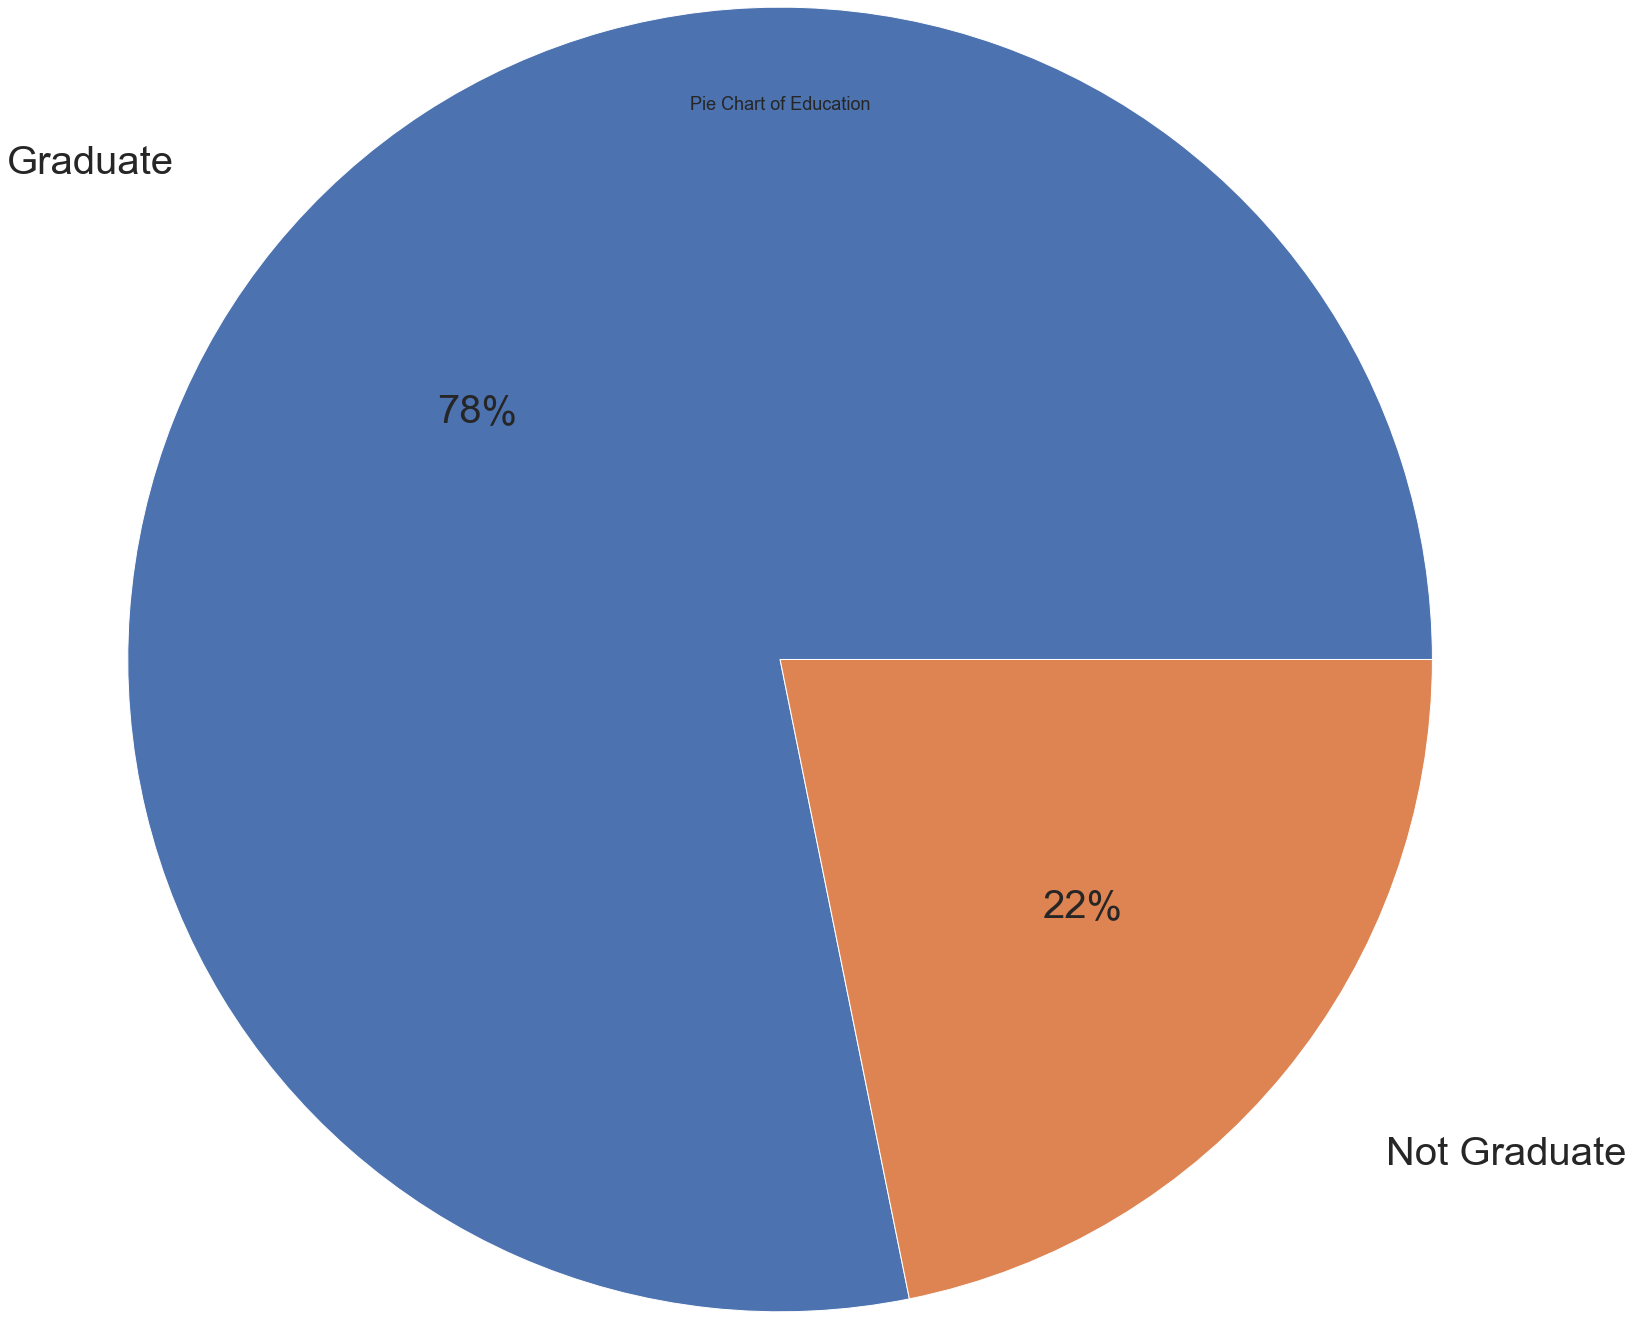

In [48]:
Educations.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Education")

In [49]:
# To Present species of Self_Employed ::
Self_Employeds = df["Self_Employed"].value_counts()
Self_Employeds

No     500
Yes     82
Name: Self_Employed, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Self_Employed')

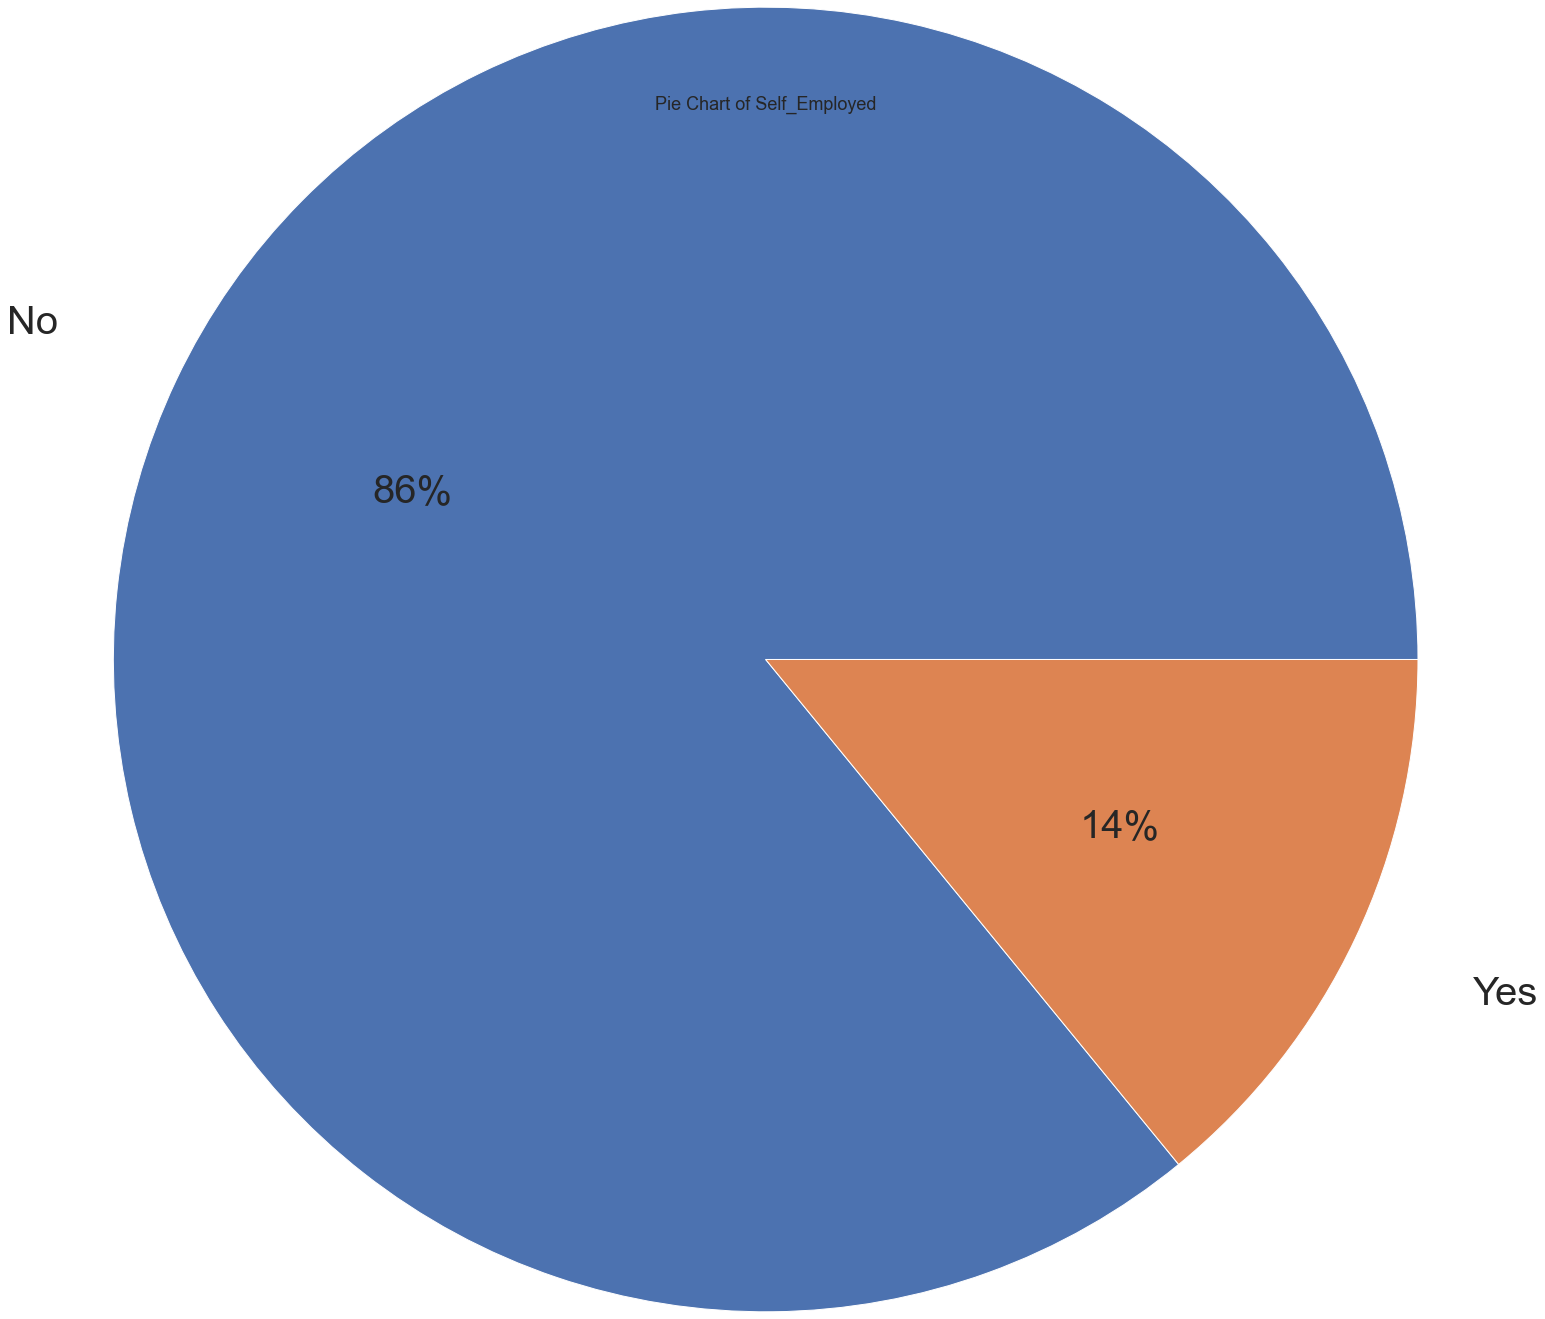

In [50]:
Self_Employeds.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Self_Employed")

In [51]:
# To Present species of ApplicantIncome ::
ApplicantIncomes = df["ApplicantIncome"].value_counts()[:40]
ApplicantIncomes

2500     9
6000     6
2600     6
4583     6
4166     5
5000     5
3333     5
3750     5
2400     4
8333     4
2583     4
6250     4
3500     3
4333     3
4000     3
3167     3
3166     3
5417     3
3000     3
3400     3
10000    3
2333     3
2479     2
3418     2
2378     2
3173     2
9323     2
4750     2
3859     2
3200     2
2917     2
1820     2
1800     2
12000    2
3667     2
5250     2
2947     2
5500     2
6400     2
4283     2
Name: ApplicantIncome, dtype: int64

Text(0.5, 1.0, 'Pie Chart of ApplicantIncome')

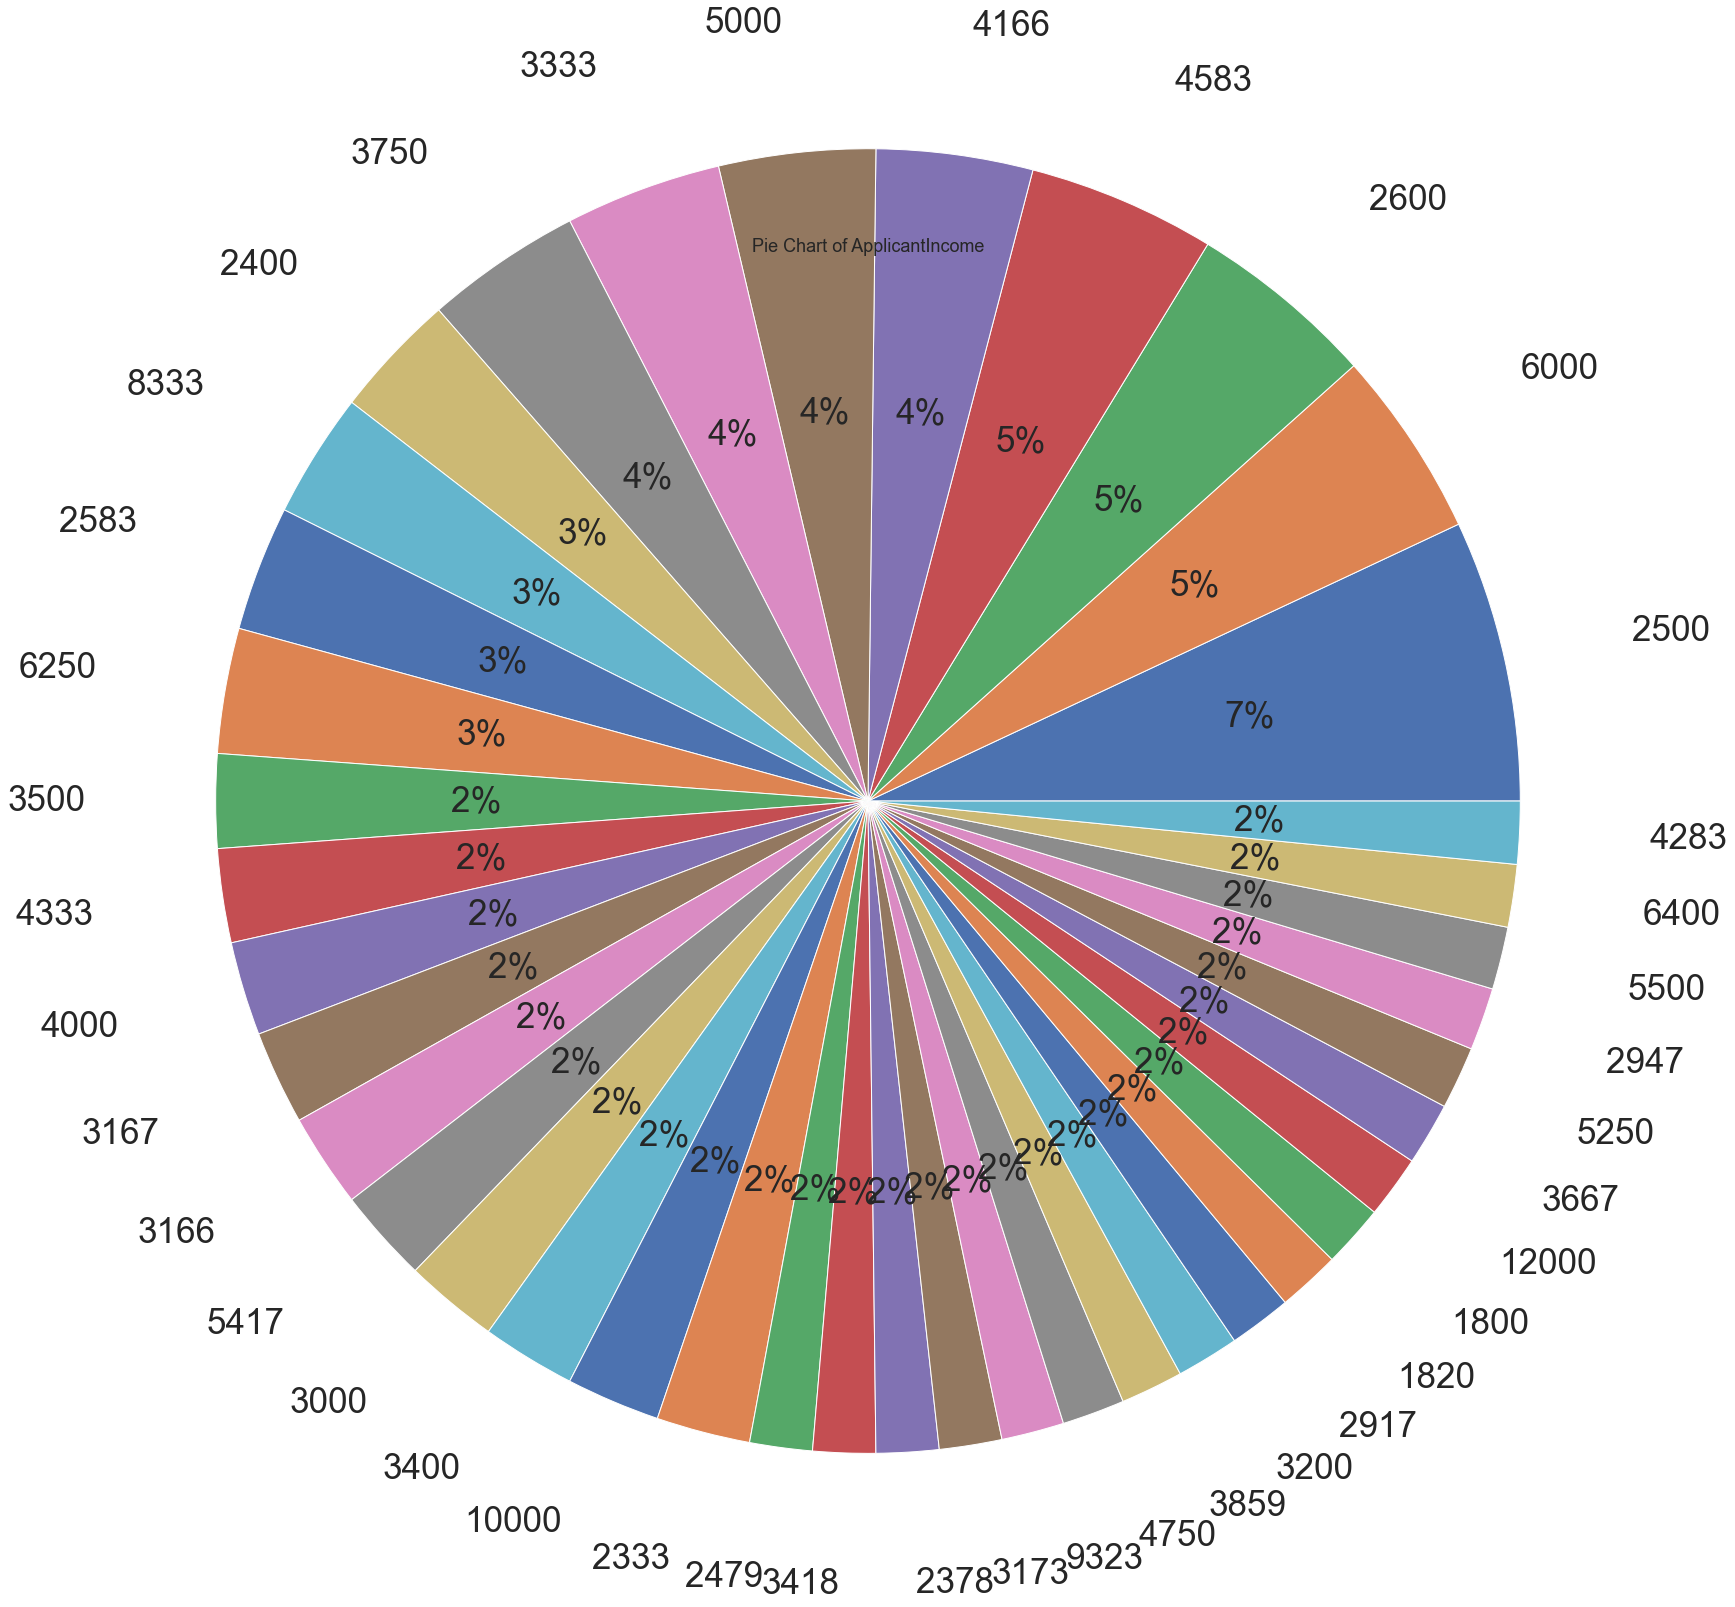

In [52]:
ApplicantIncomes.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 35)
plt.title("Pie Chart of ApplicantIncome")

In [53]:
# To Present species of Property_Area ::
Property_Areas = df["Property_Area"].value_counts()
Property_Areas

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Property_Area')

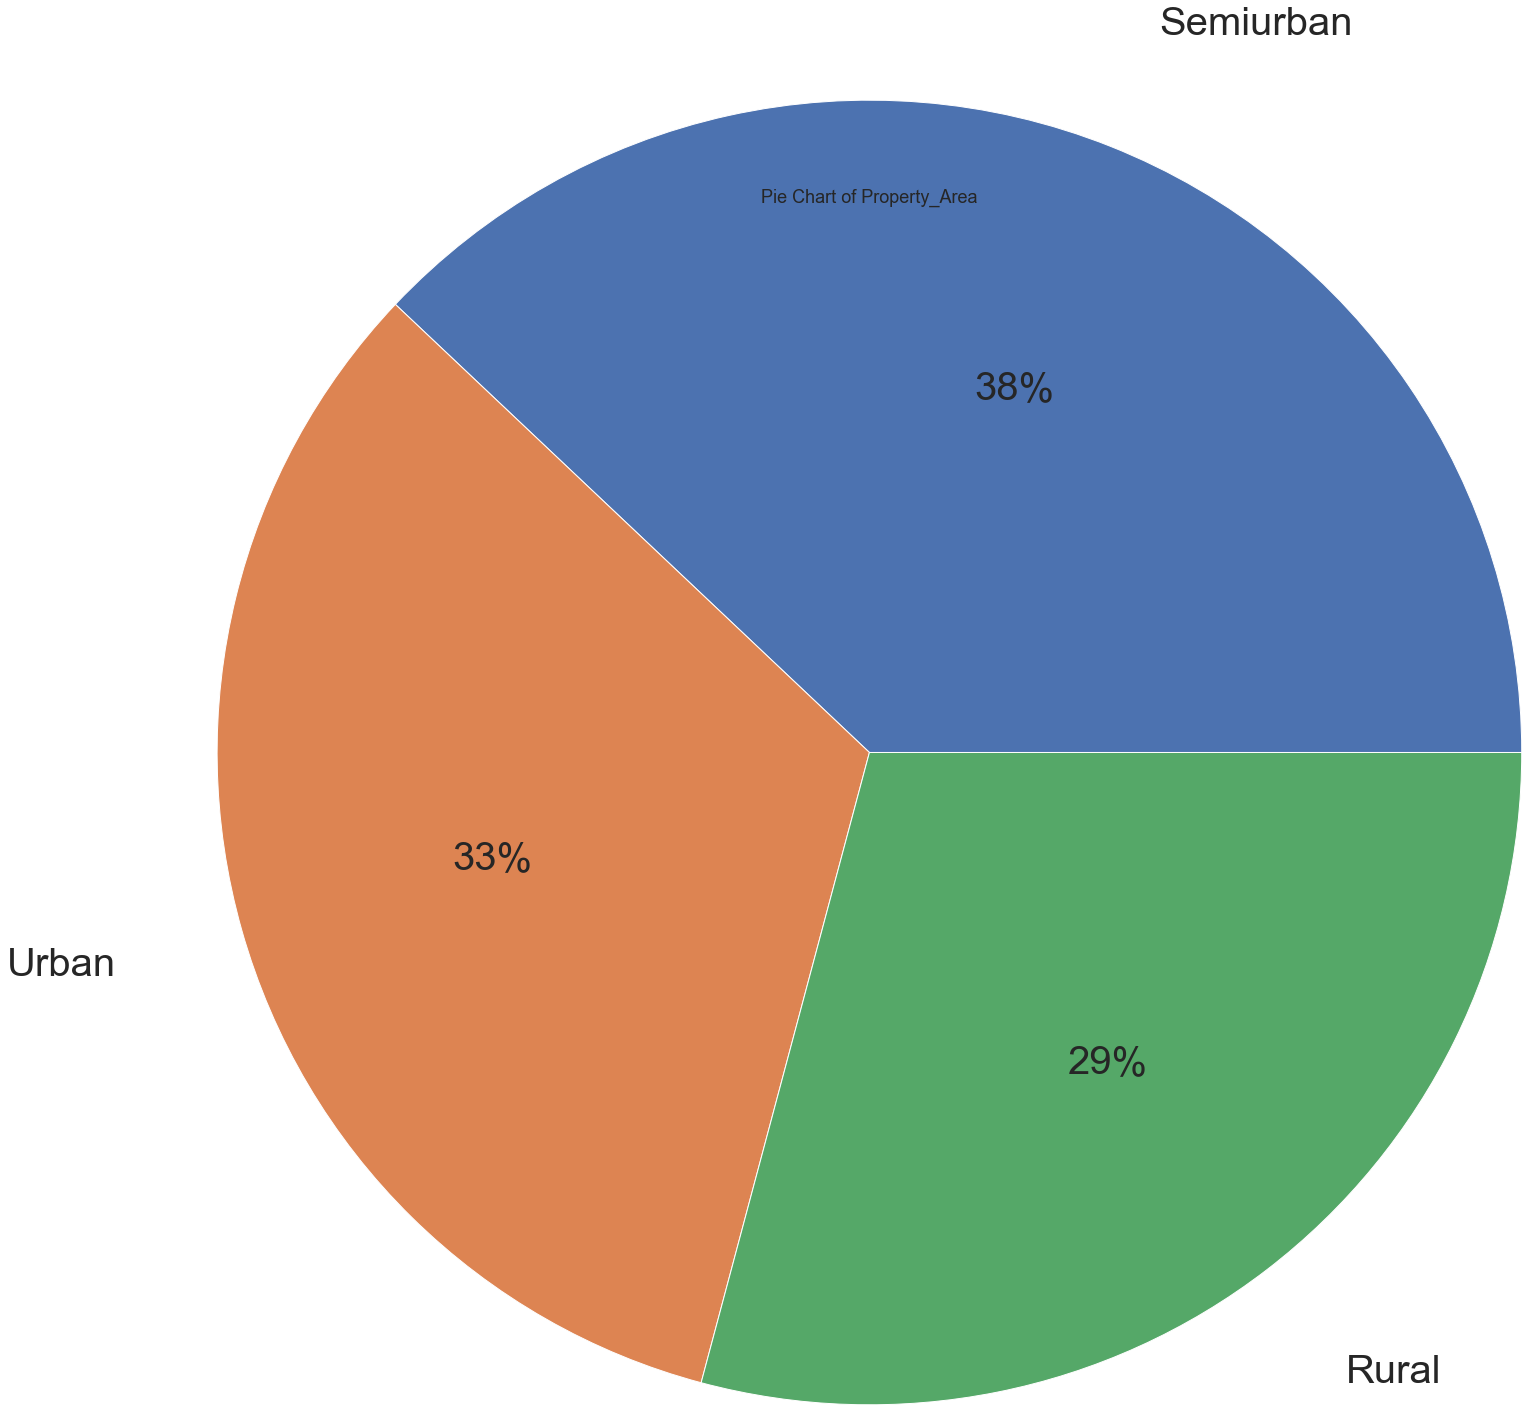

In [54]:
Property_Areas.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Property_Area")

In [55]:
# To Present species of Loan_Status ::
Loan_Statuss = df["Loan_Status"].value_counts()
Loan_Statuss

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Loan_Status')

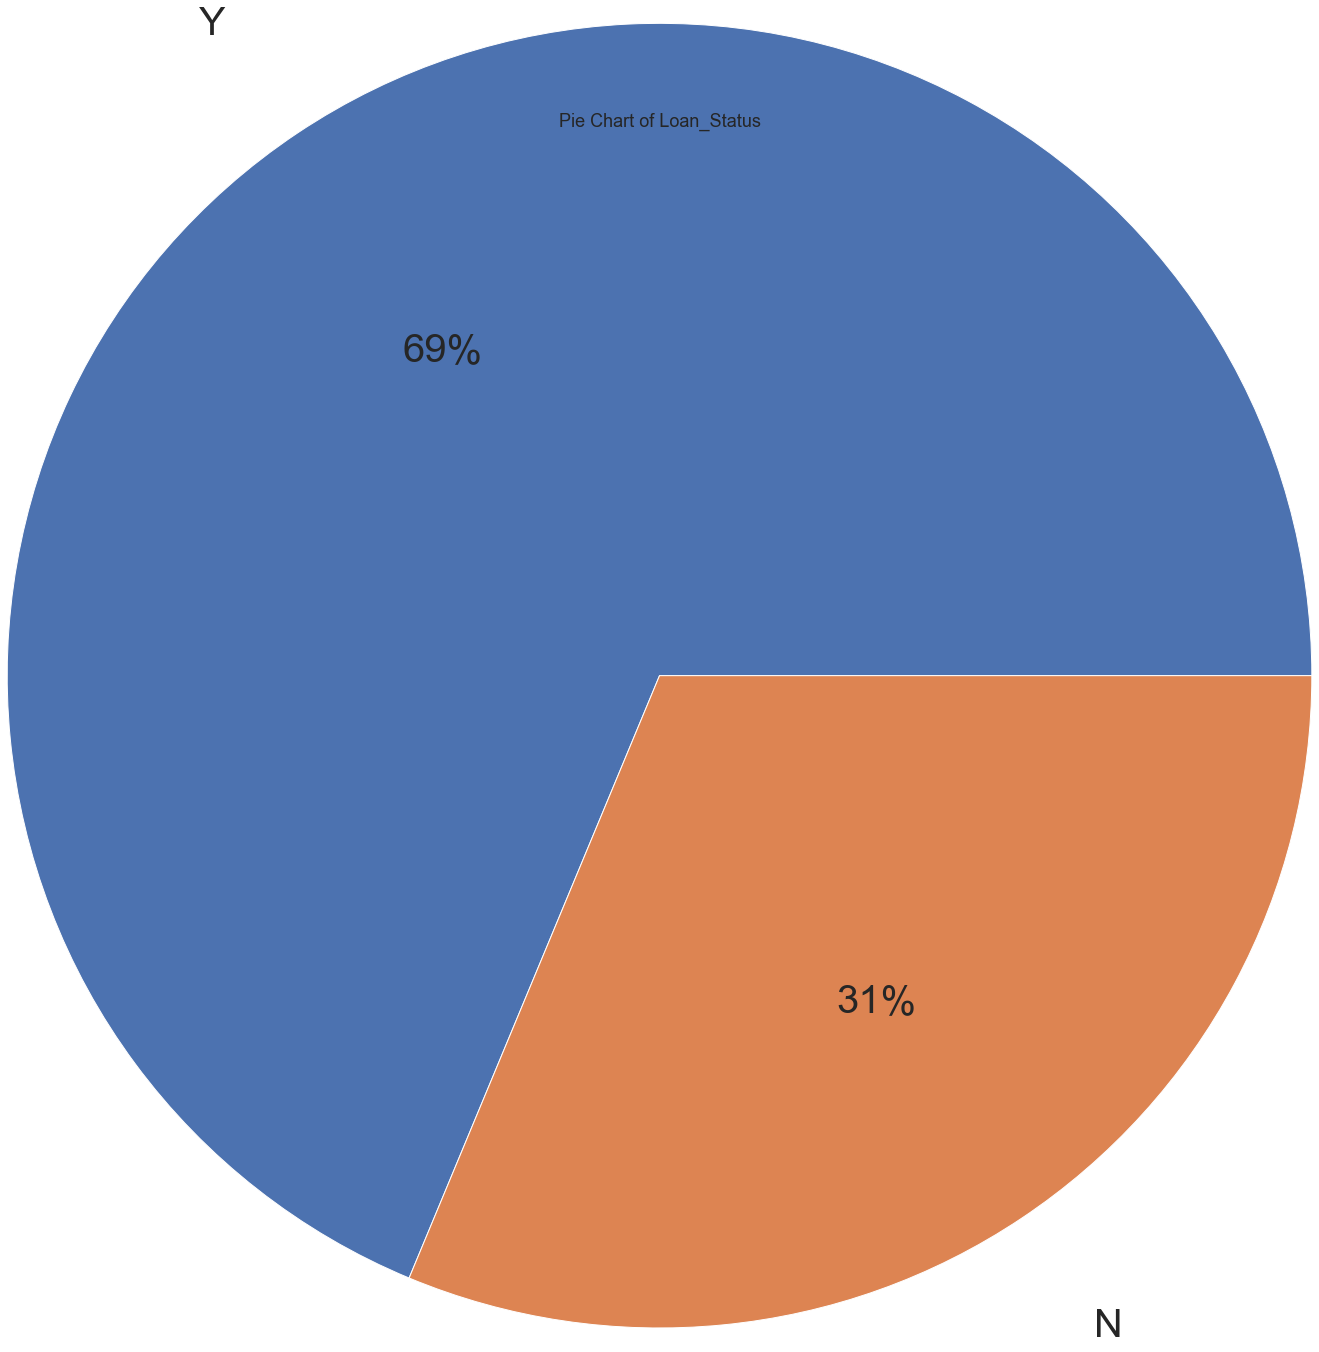

In [56]:
Loan_Statuss.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Loan_Status")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Distribution Plot of ApplicantIncome')

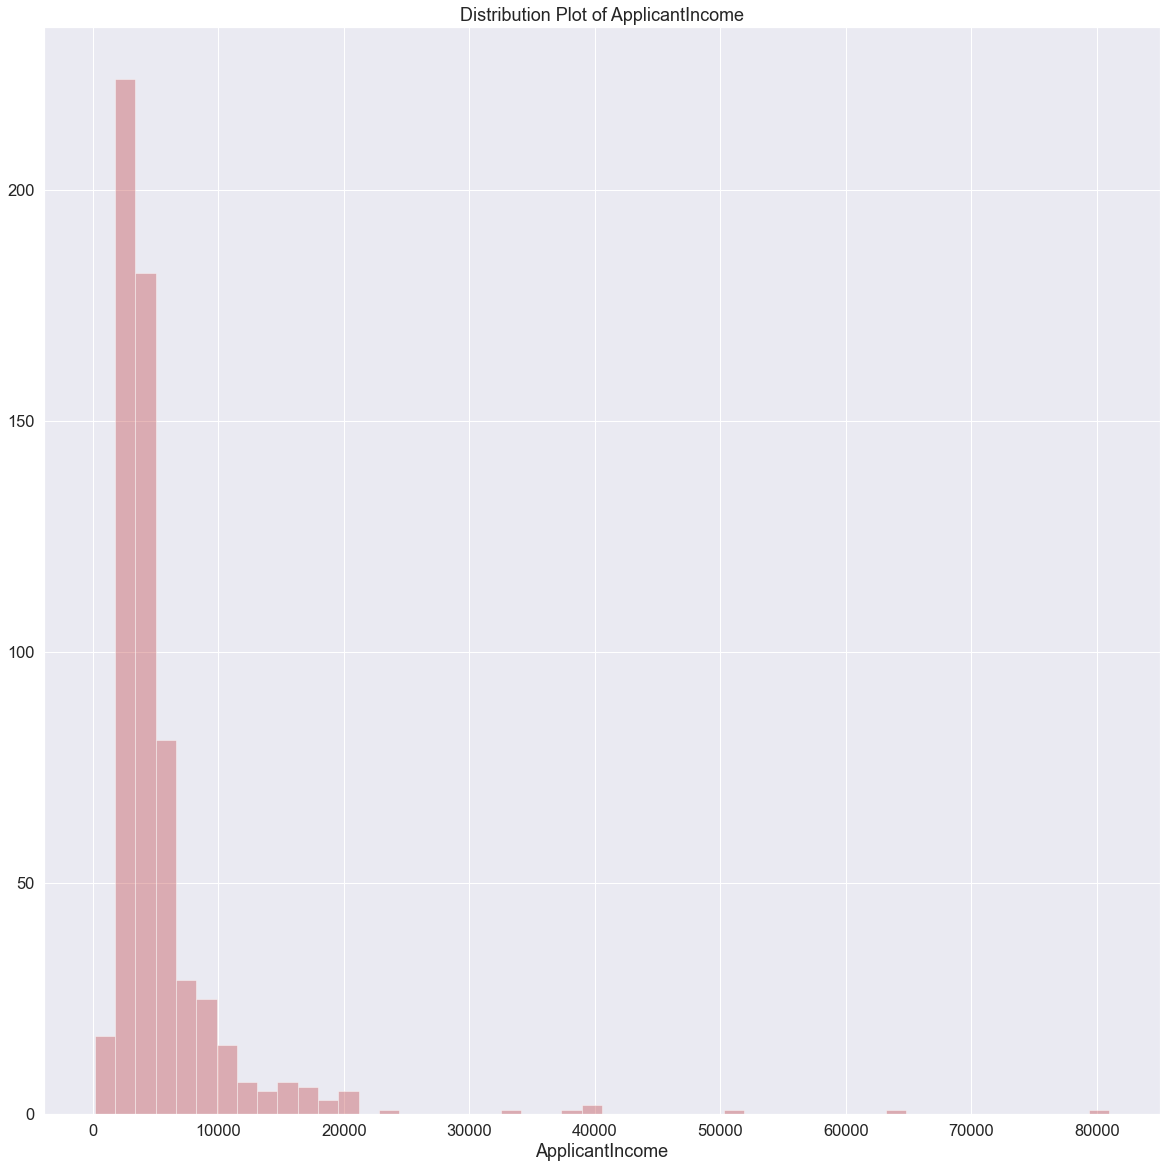

In [58]:
sns.distplot(df["ApplicantIncome"] , kde=False , color="r")
plt.title("Distribution Plot of ApplicantIncome")

Text(0.5, 1.0, 'Kde Plot of ApplicantIncome')

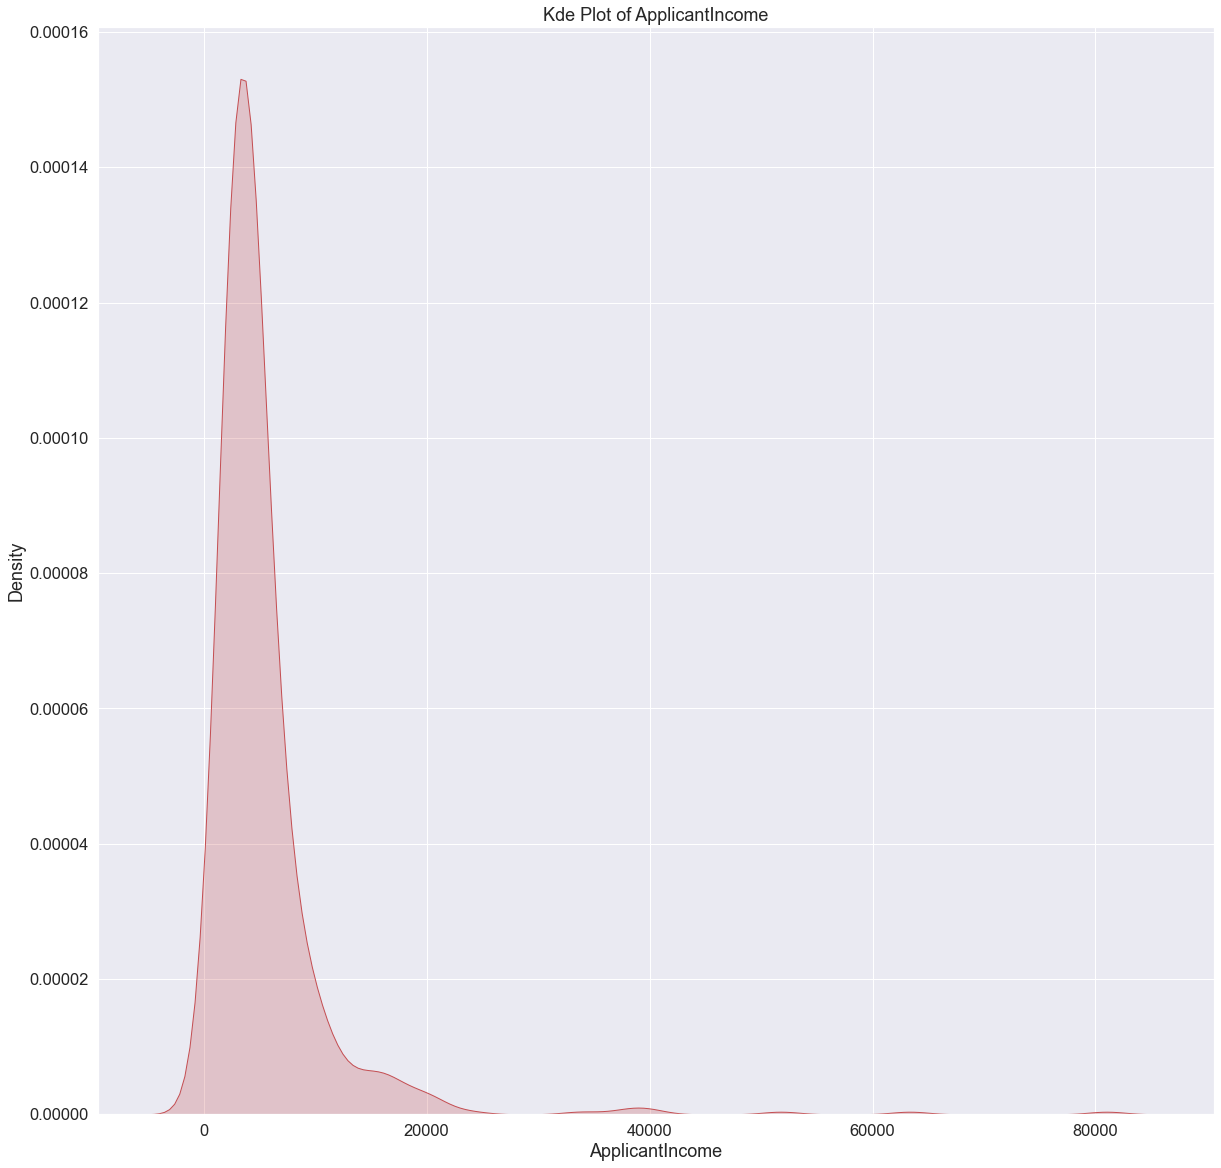

In [59]:
sns.kdeplot(df["ApplicantIncome"] , shade=True , color="r")
plt.title("Kde Plot of ApplicantIncome")

Text(0.5, 1.0, 'Distribution Plot of CoapplicantIncome')

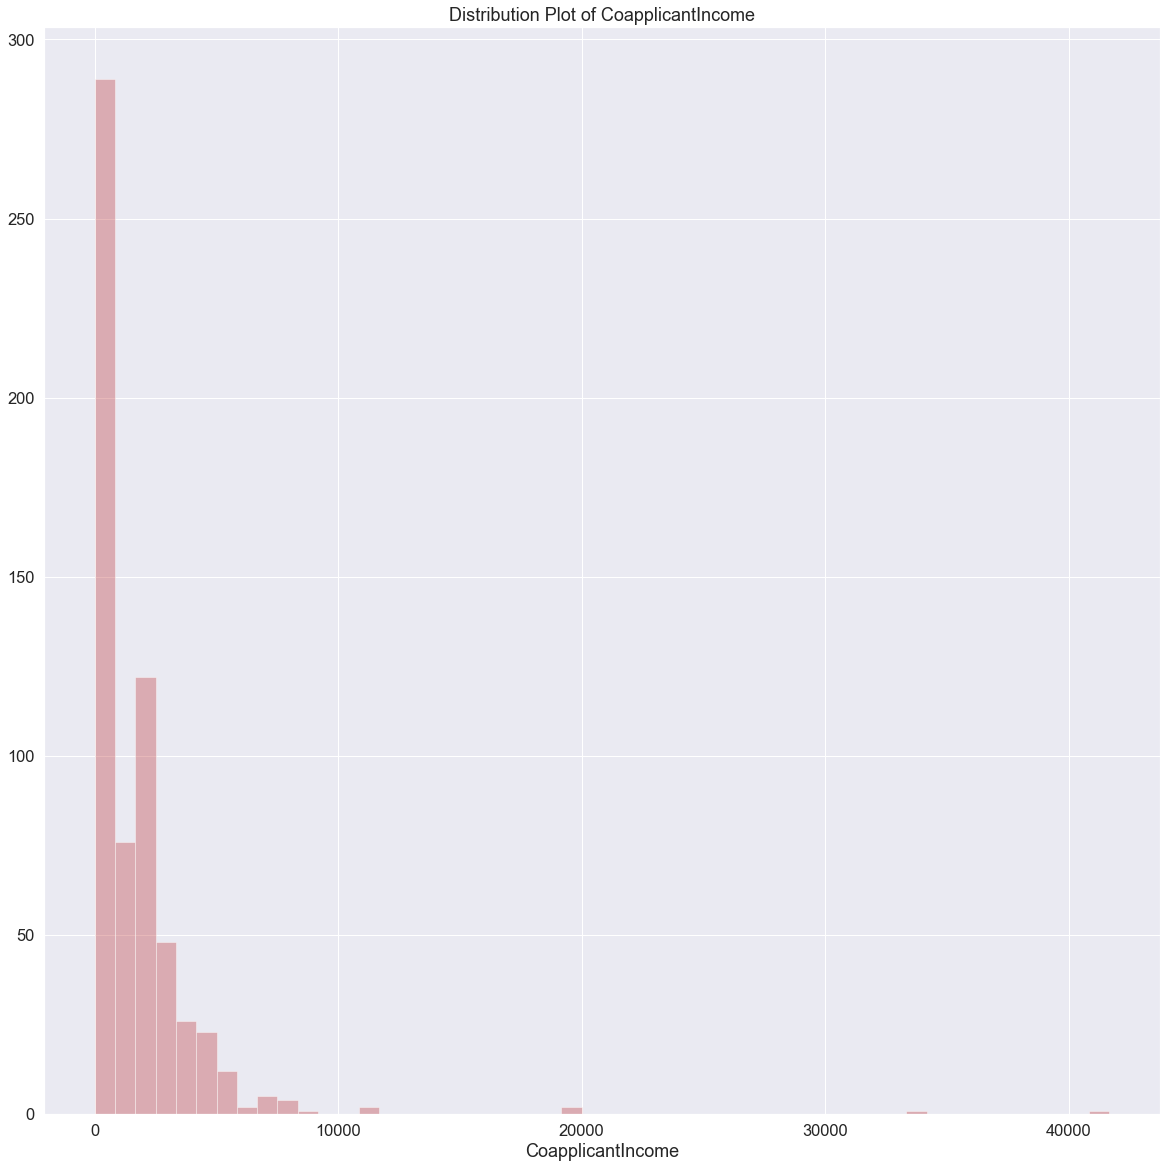

In [60]:
sns.distplot(df["CoapplicantIncome"] , kde=False , color="r")
plt.title("Distribution Plot of CoapplicantIncome")

Text(0.5, 1.0, 'Kde Plot of CoapplicantIncome')

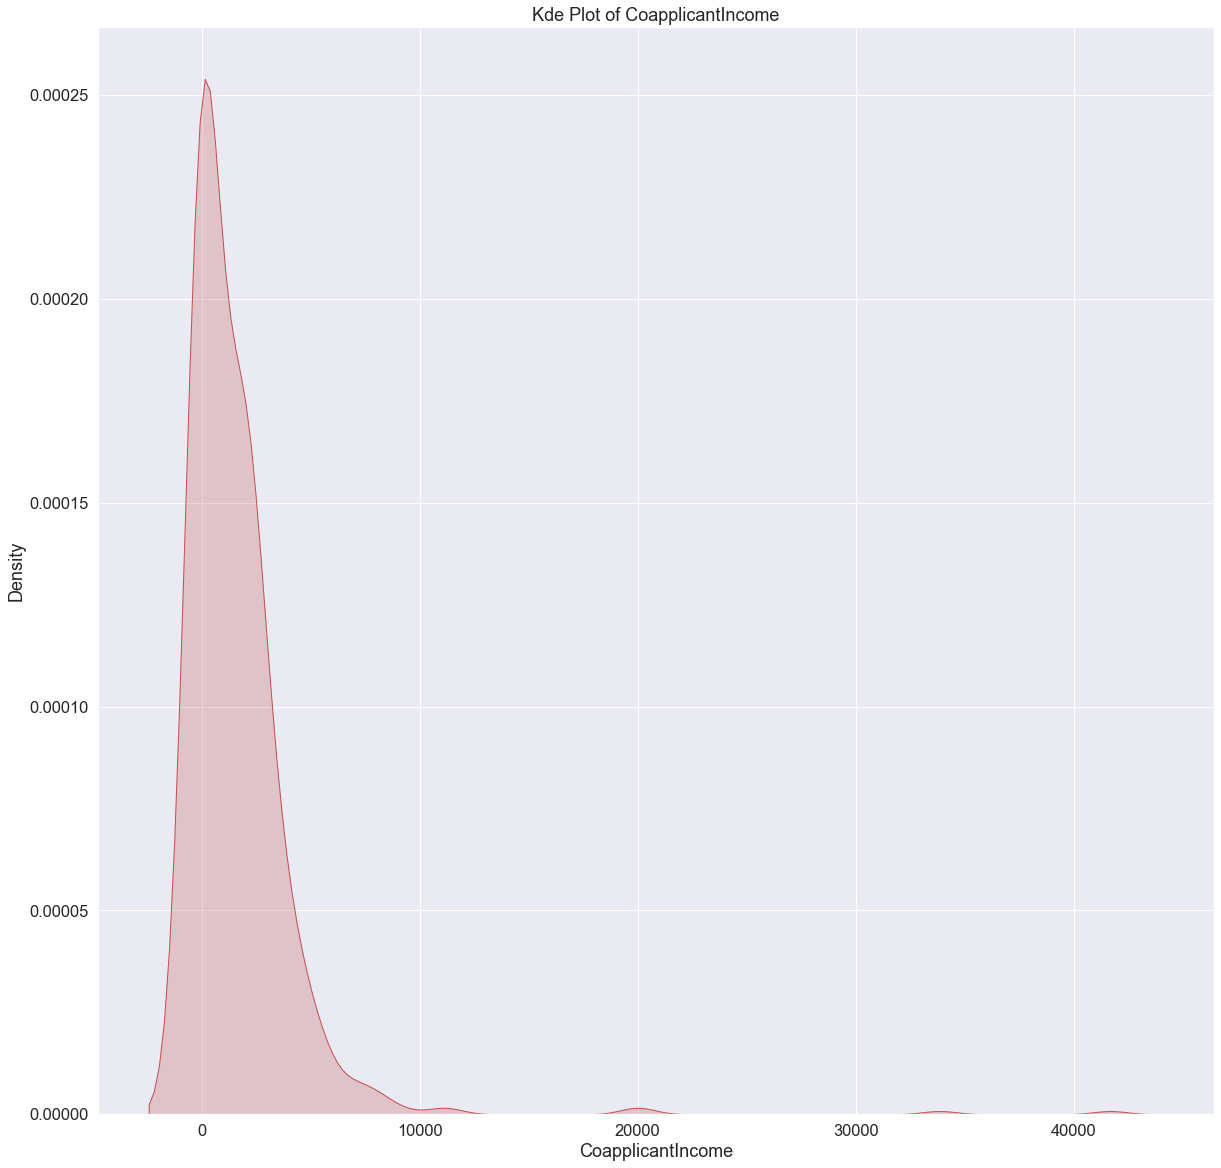

In [61]:
sns.kdeplot(df["CoapplicantIncome"] , shade=True , color="r")
plt.title("Kde Plot of CoapplicantIncome")

Text(0.5, 1.0, 'Distribution Plot of LoanAmount')

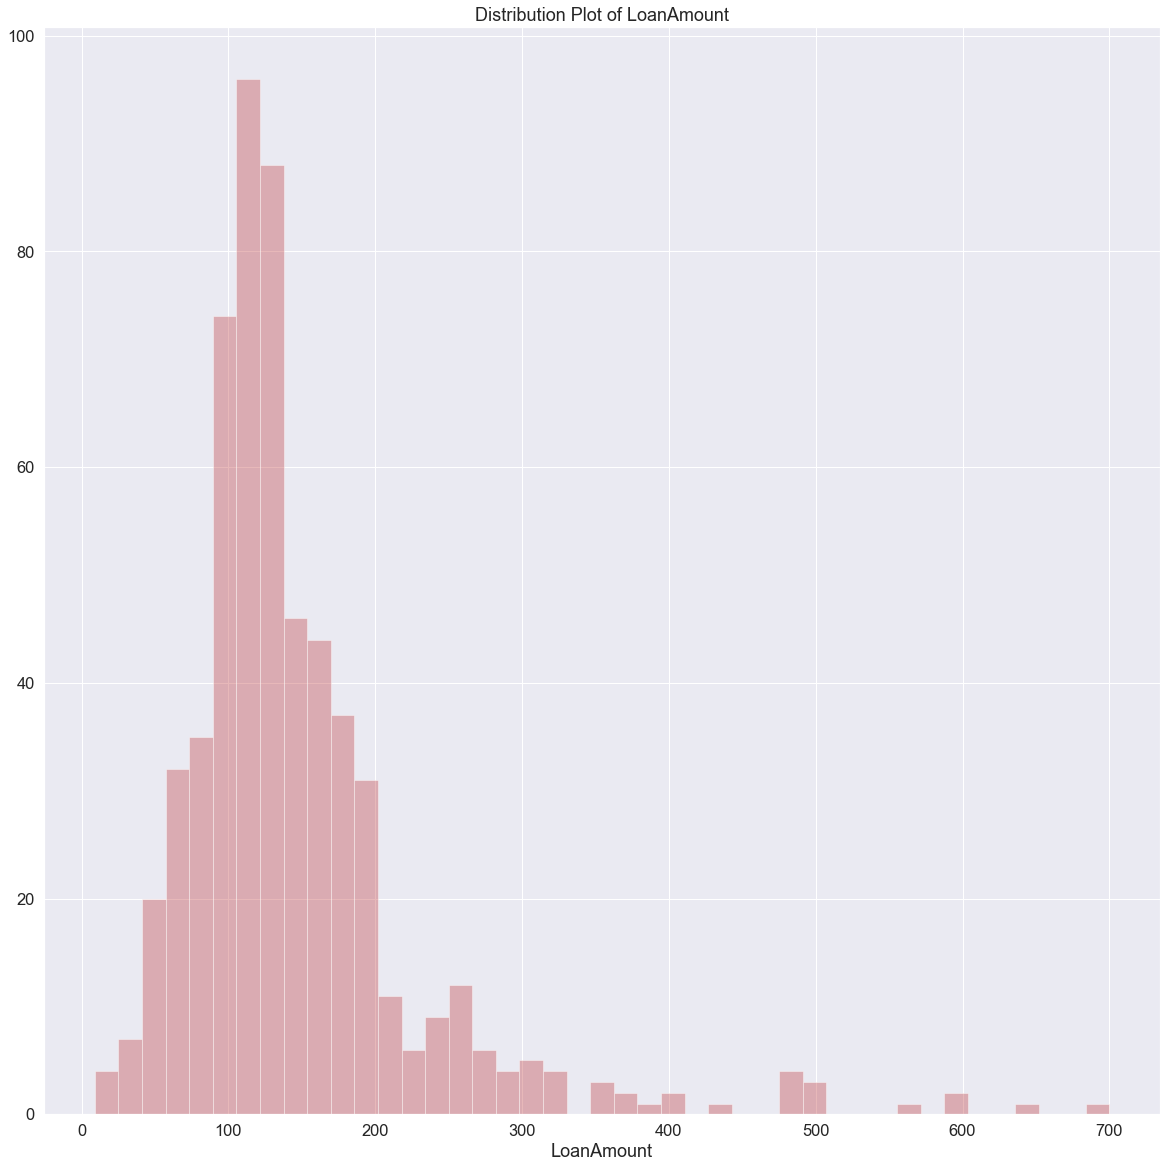

In [62]:
sns.distplot(df["LoanAmount"] , kde=False , color="r")
plt.title("Distribution Plot of LoanAmount")

Text(0.5, 1.0, 'Kde Plot of LoanAmount')

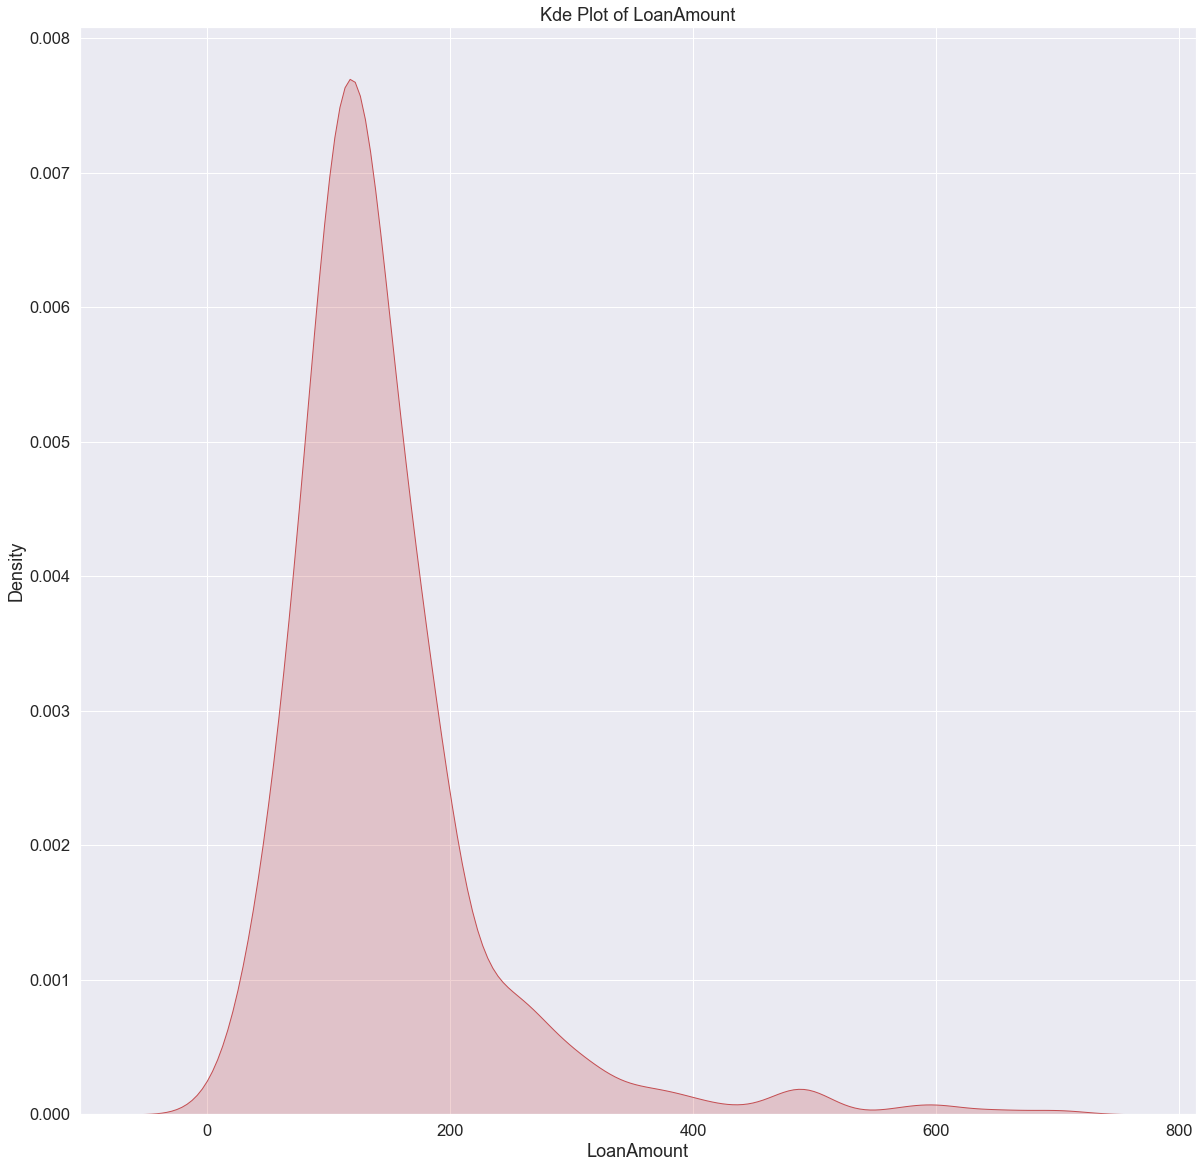

In [63]:
sns.kdeplot(df["LoanAmount"] , shade=True , color="r")
plt.title("Kde Plot of LoanAmount")

Text(0.5, 1.0, 'Distribution Plot of Loan_Amount_Term')

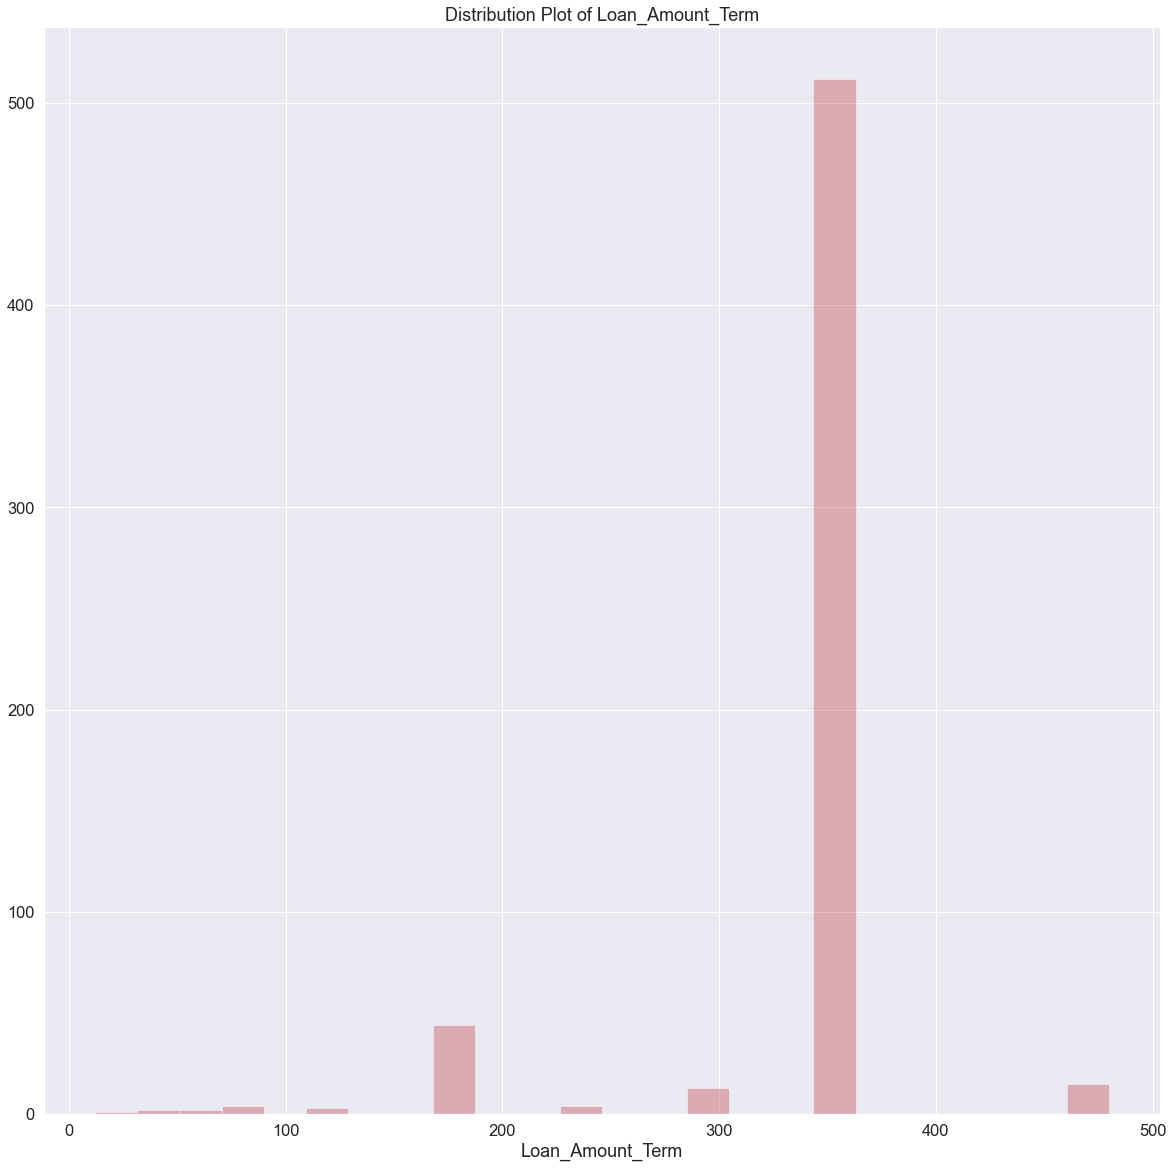

In [64]:
sns.distplot(df["Loan_Amount_Term"] , kde=False , color="r")
plt.title("Distribution Plot of Loan_Amount_Term")

Text(0.5, 1.0, 'Kde Plot of Loan_Amount_Term')

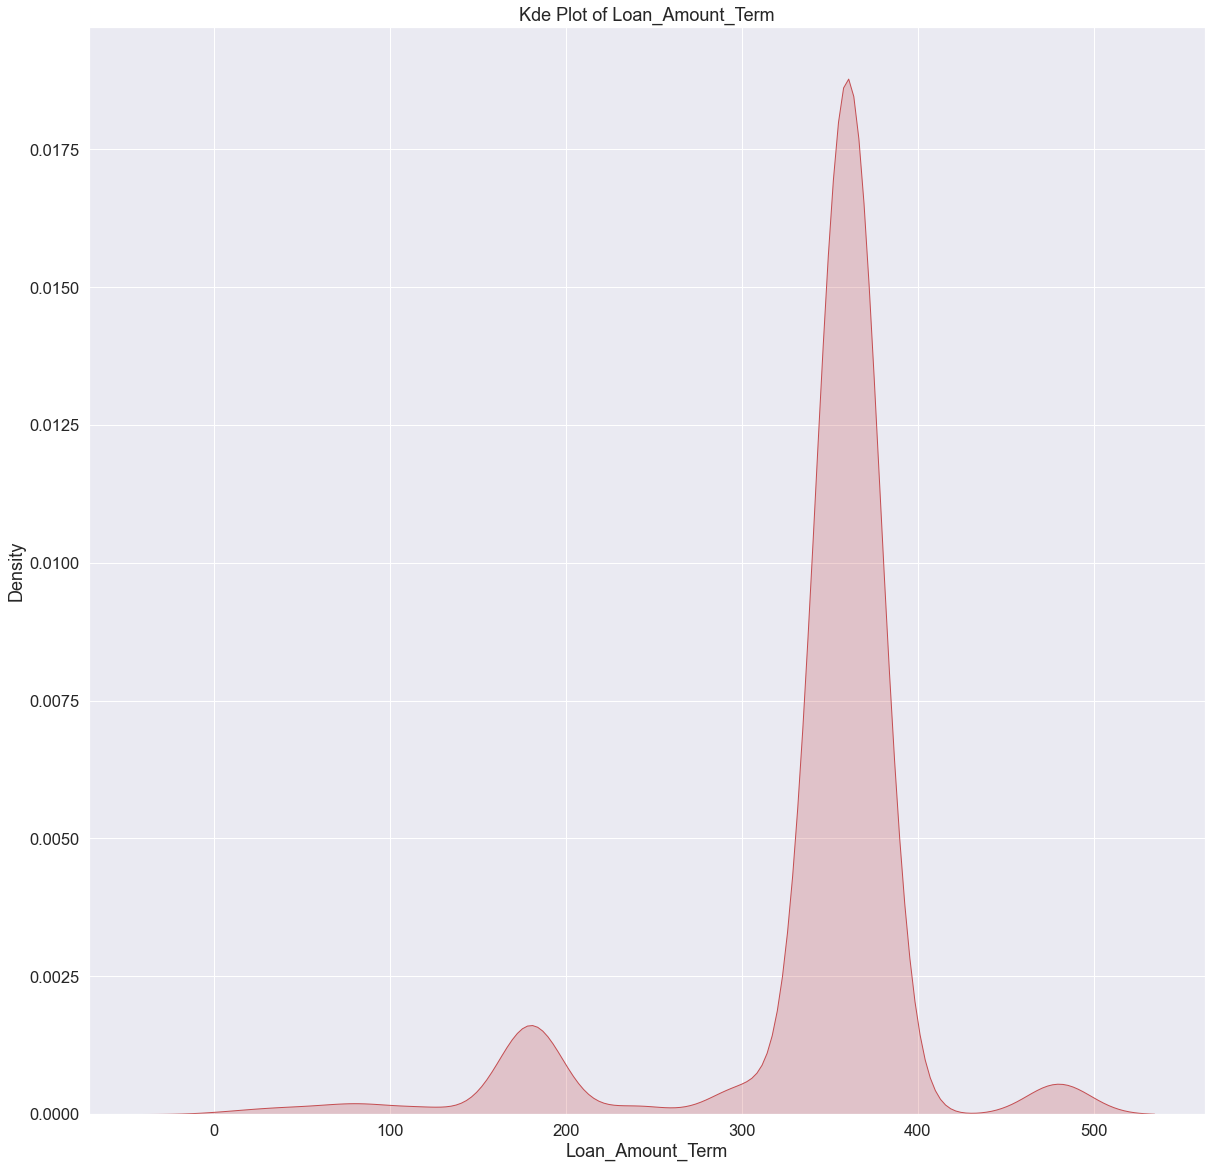

In [65]:
sns.kdeplot(df["Loan_Amount_Term"] , shade=True , color="r")
plt.title("Kde Plot of Loan_Amount_Term")

Text(0.5, 1.0, 'Distribution Plot of Credit_History')

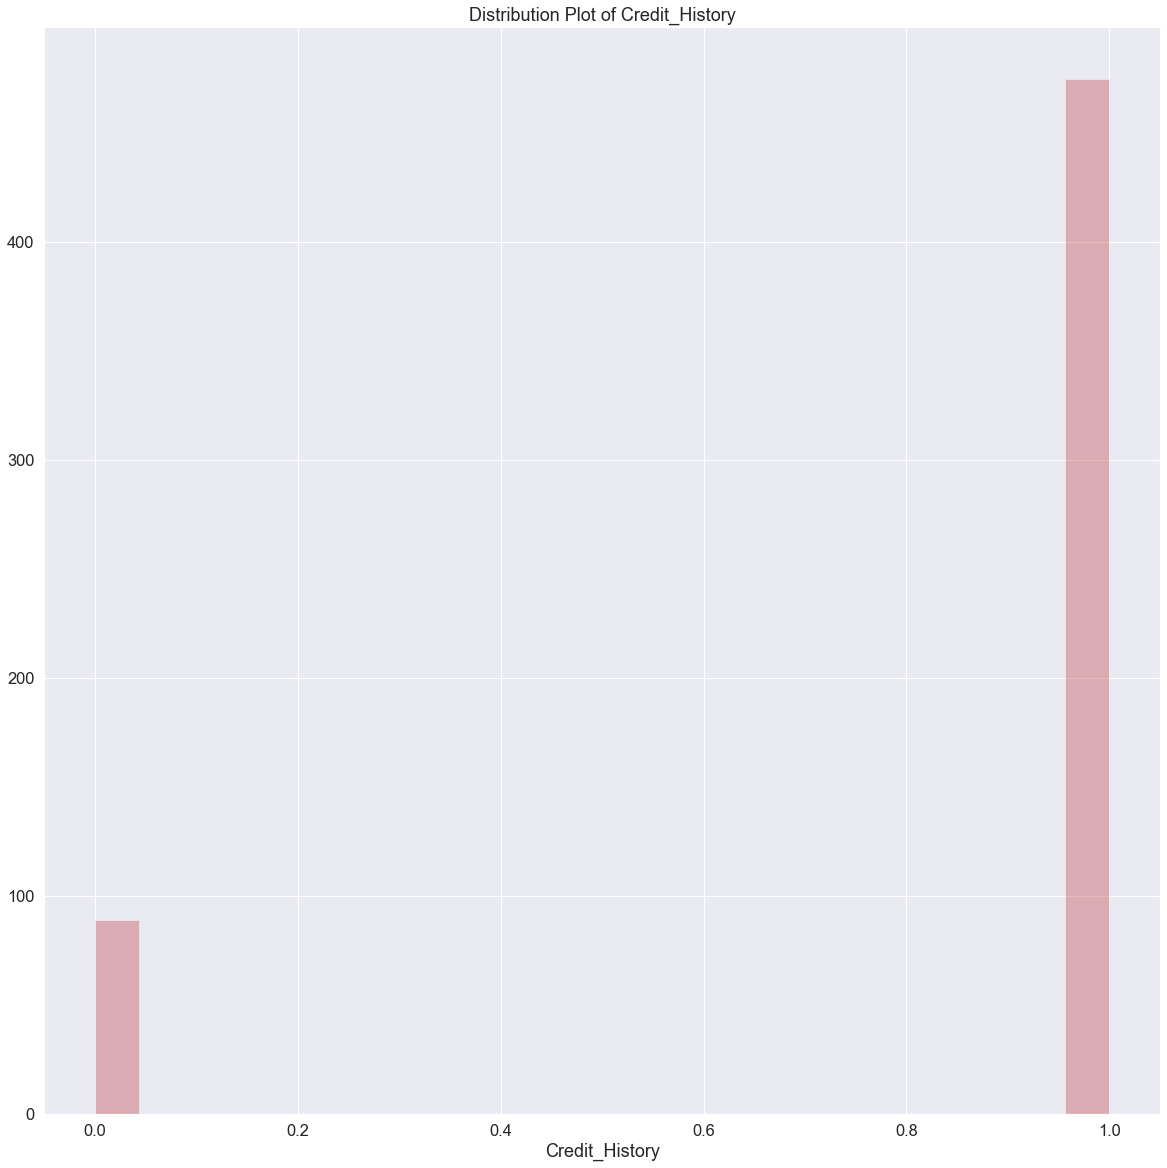

In [66]:
sns.distplot(df["Credit_History"] , kde=False , color="r")
plt.title("Distribution Plot of Credit_History")

Text(0.5, 1.0, 'Kde Plot of Credit_History')

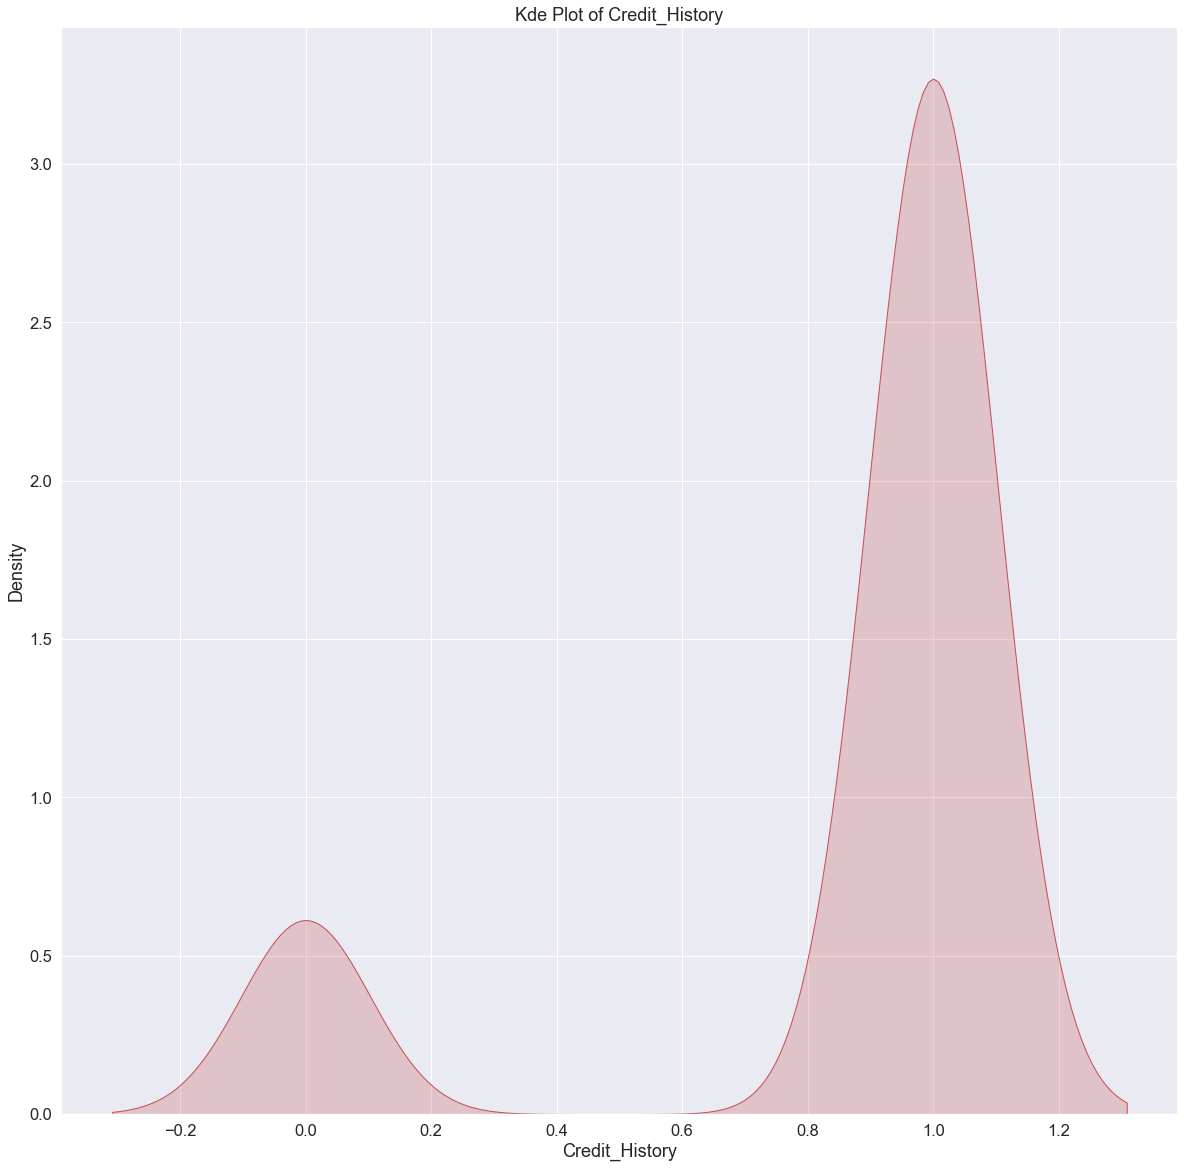

In [67]:
sns.kdeplot(df["Credit_History"] , shade=True , color="r")
plt.title("Kde Plot of Credit_History")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


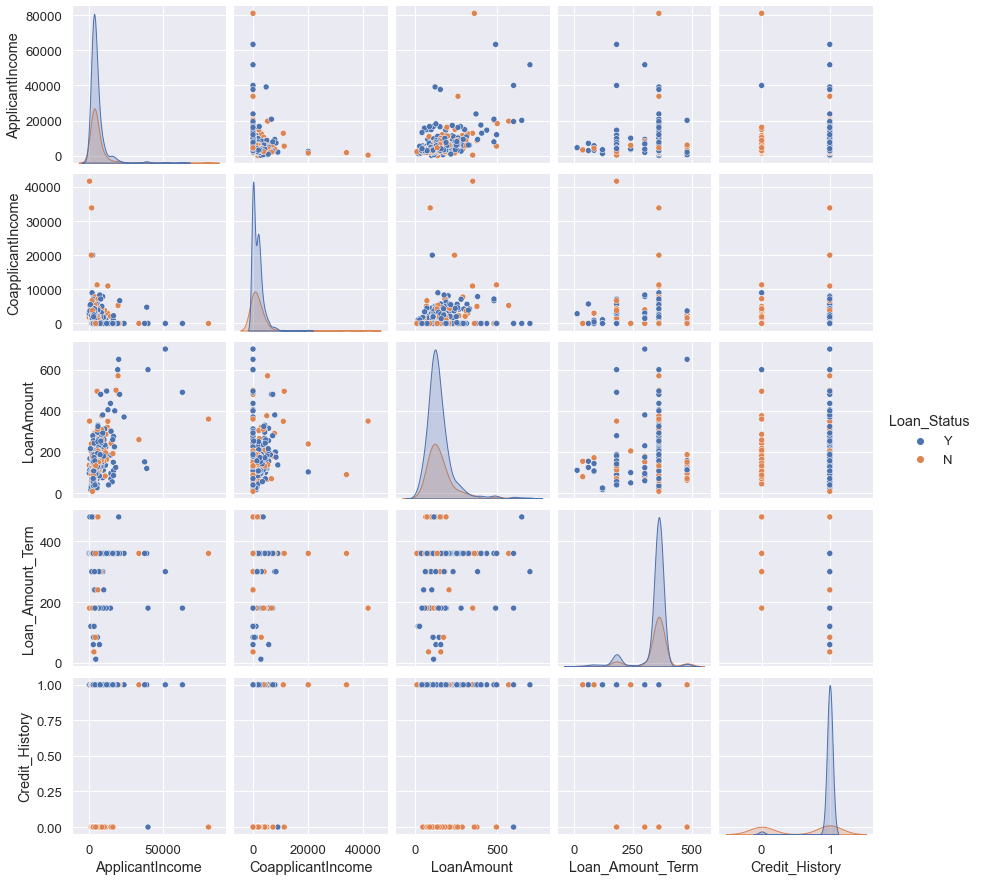

In [69]:
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.2)
sns.pairplot(df , hue = "Loan_Status")

Text(0.5, 1.0, 'Swarm Plot of Gender and ApplicantIncome Based on Loan_Status ')

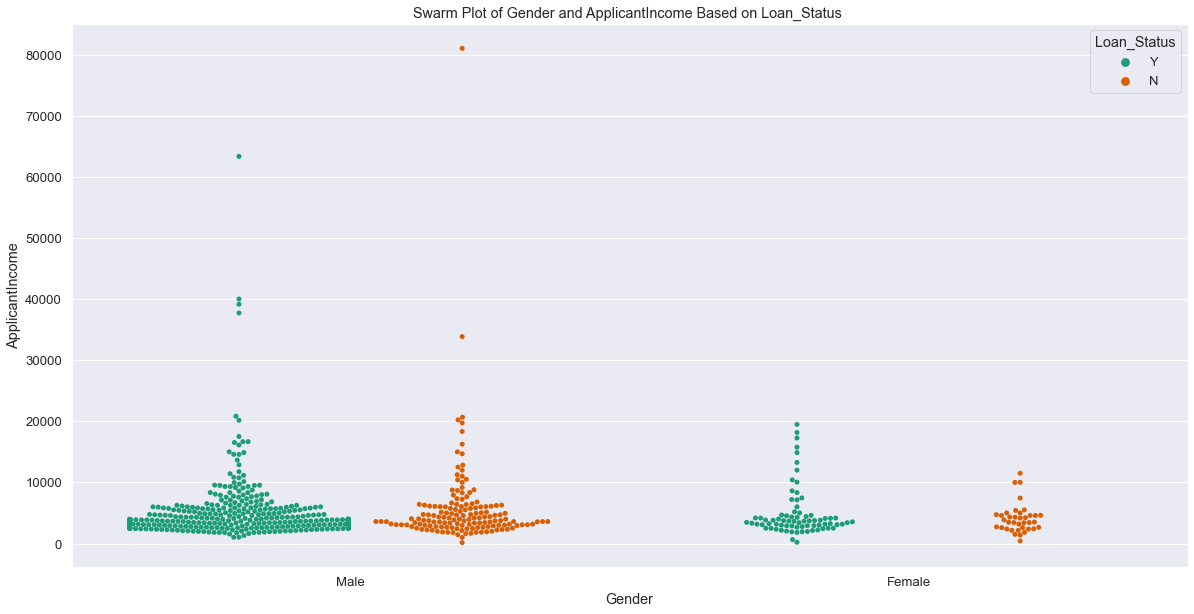

In [70]:
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.2)
sns.swarmplot( x = "Gender" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Gender and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Swarm Plot of Married and ApplicantIncome Based on Loan_Status ')

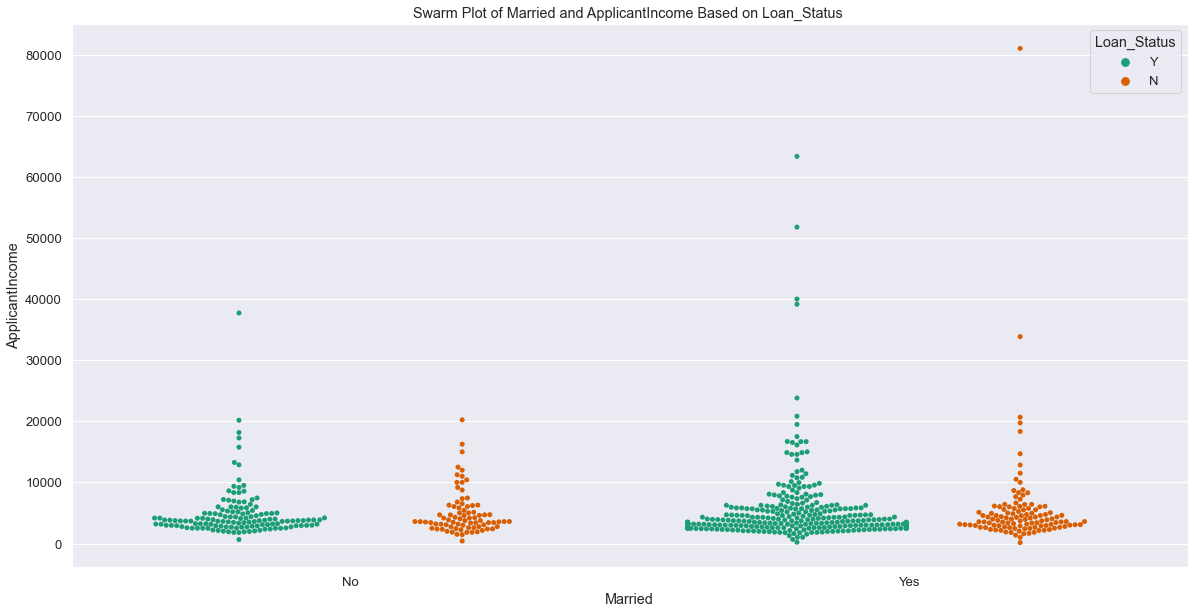

In [71]:
sns.swarmplot( x = "Married" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Married and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Swarm Plot of Dependents and ApplicantIncome Based on Loan_Status ')

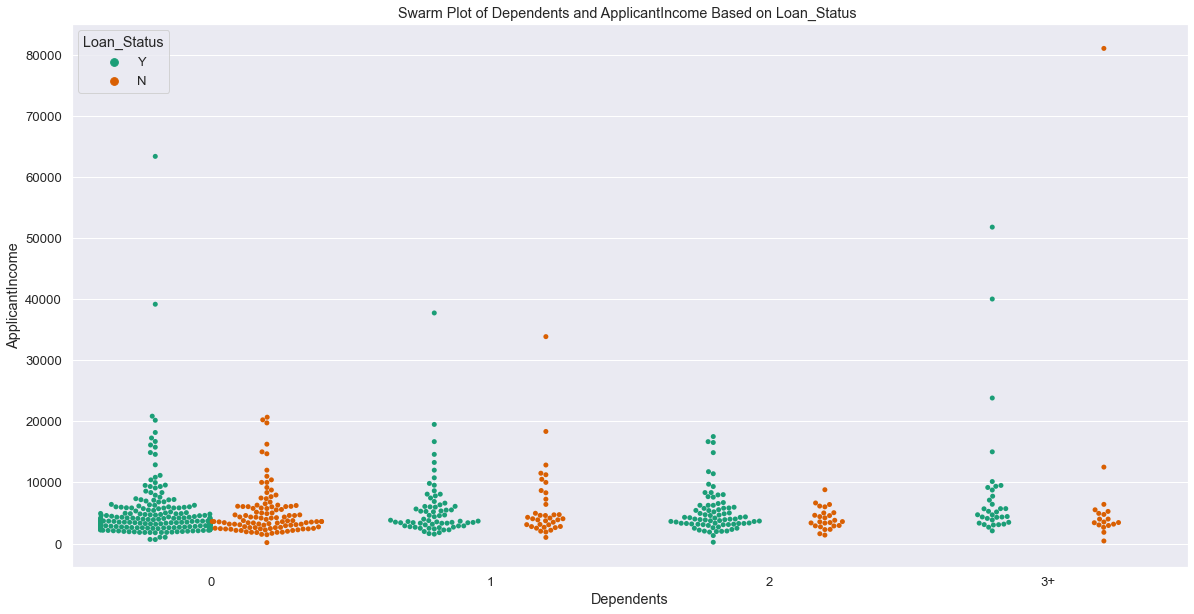

In [72]:
sns.swarmplot( x = "Dependents" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Dependents and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Swarm Plot of Education and ApplicantIncome Based on Loan_Status ')

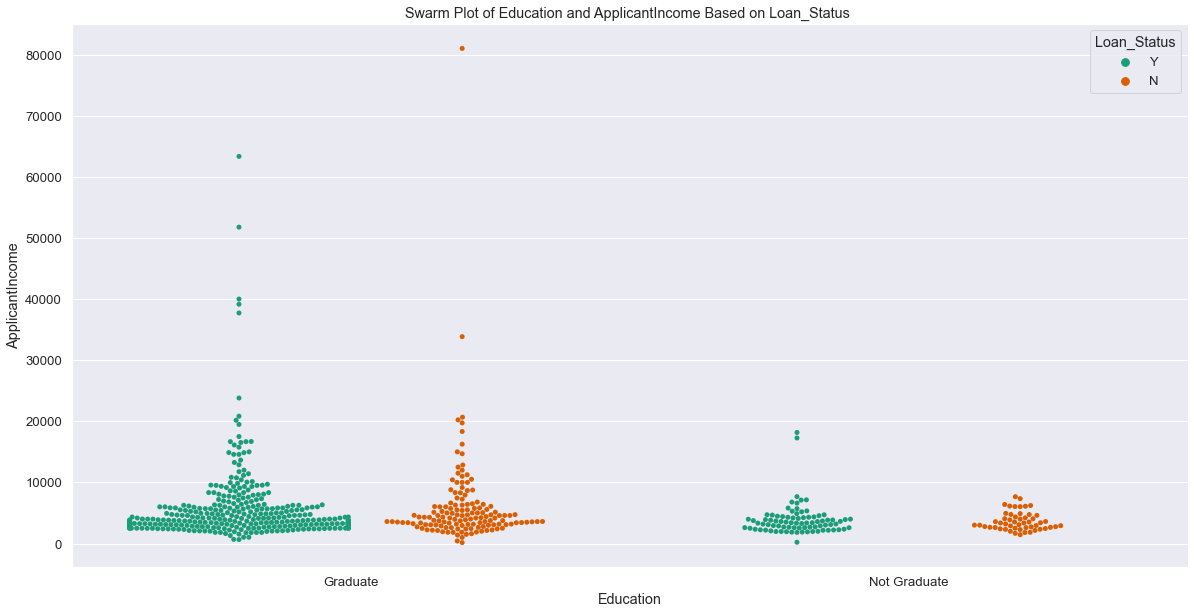

In [73]:
sns.swarmplot( x = "Education" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Education and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Swarm Plot of Self_Employed and ApplicantIncome Based on Loan_Status ')

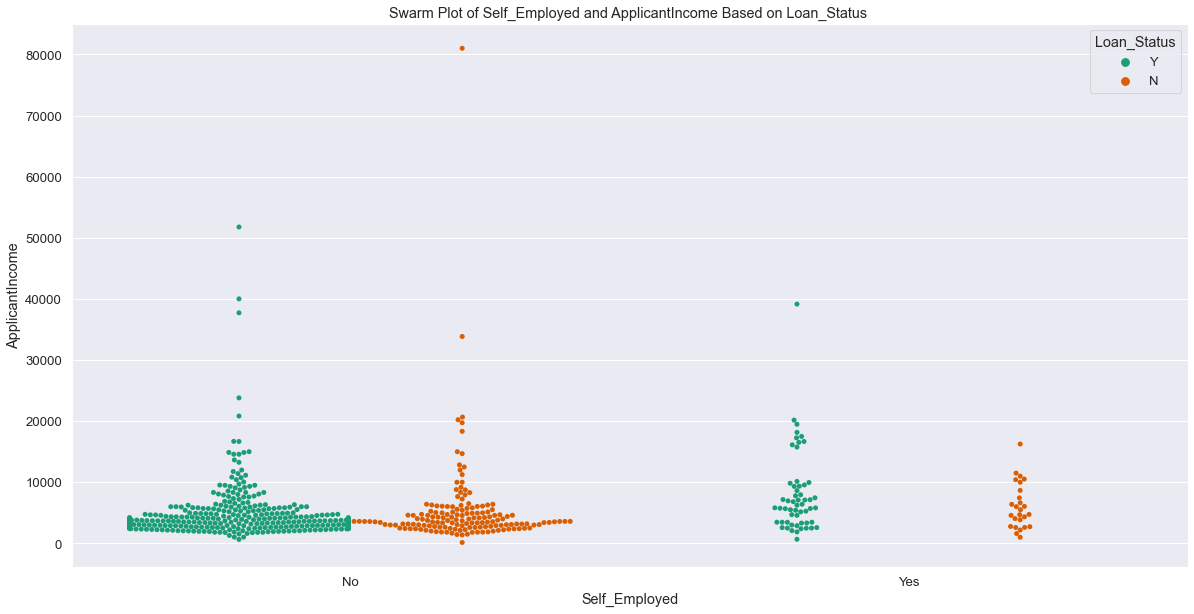

In [74]:
sns.swarmplot( x = "Self_Employed" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Self_Employed and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Swarm Plot of Property_Area and ApplicantIncome Based on Loan_Status ')

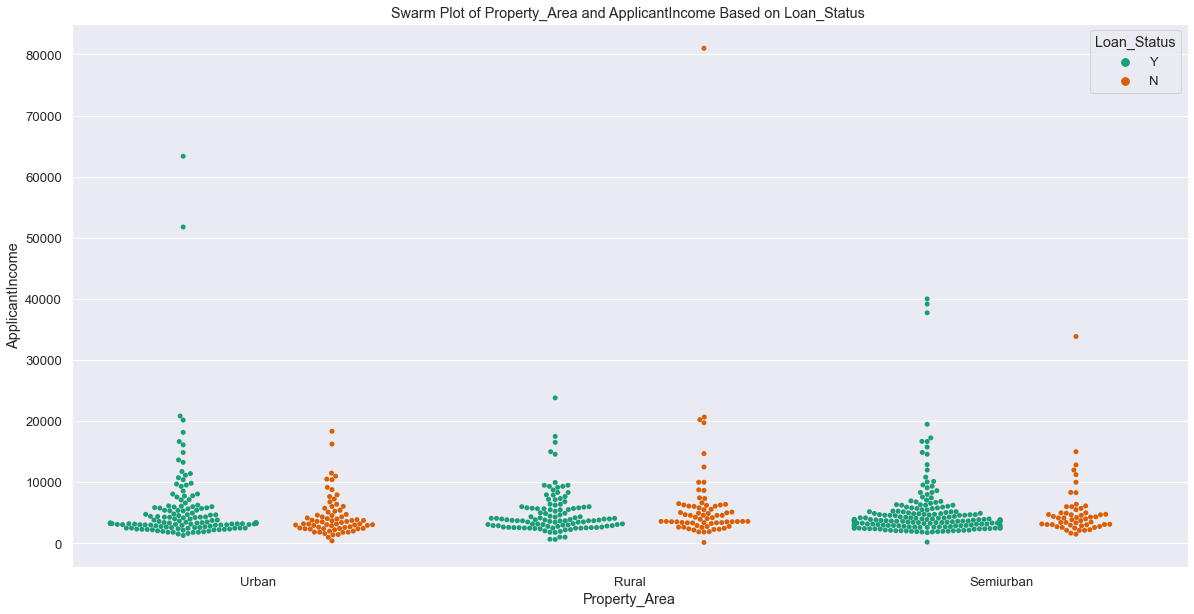

In [75]:
sns.swarmplot( x = "Property_Area" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Property_Area and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Swarm Plot of Loan_Status and ApplicantIncome Based on Loan_Status ')

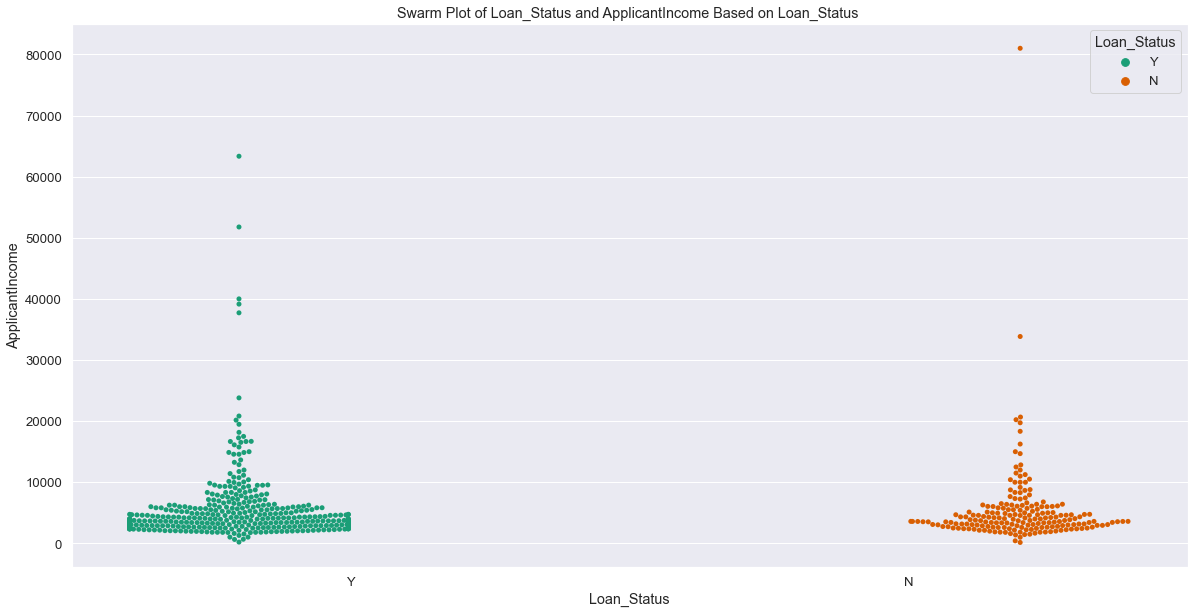

In [76]:
sns.swarmplot( x = "Loan_Status" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Loan_Status and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Gender and ApplicantIncome Based on Loan_Status ')

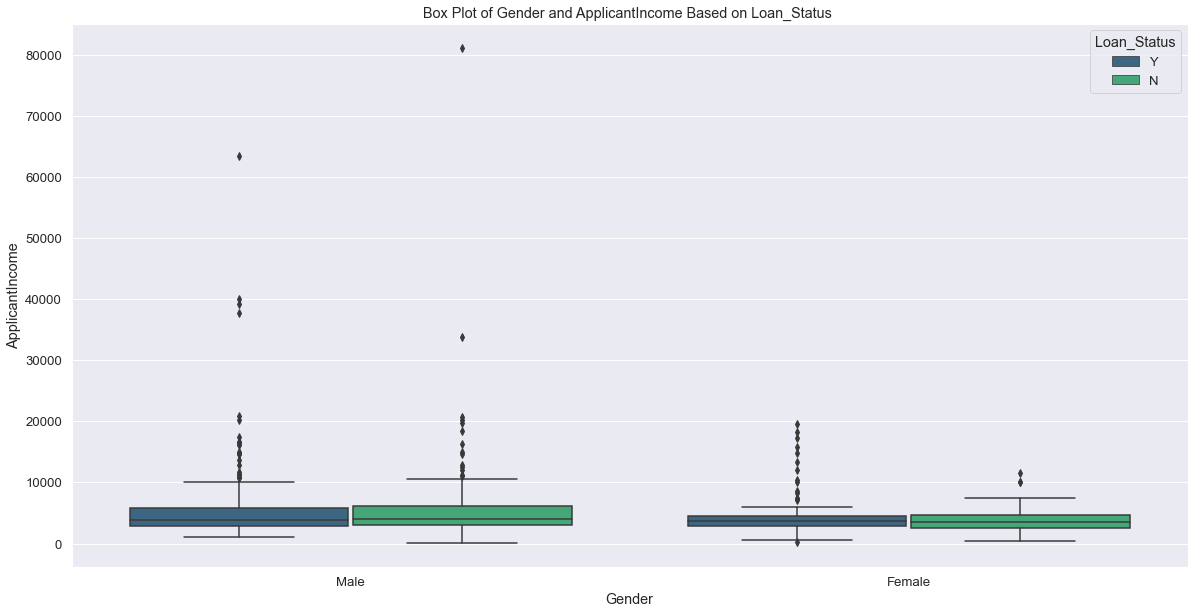

In [77]:
sns.boxplot( x = "Gender" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Gender and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Married and ApplicantIncome Based on Loan_Status ')

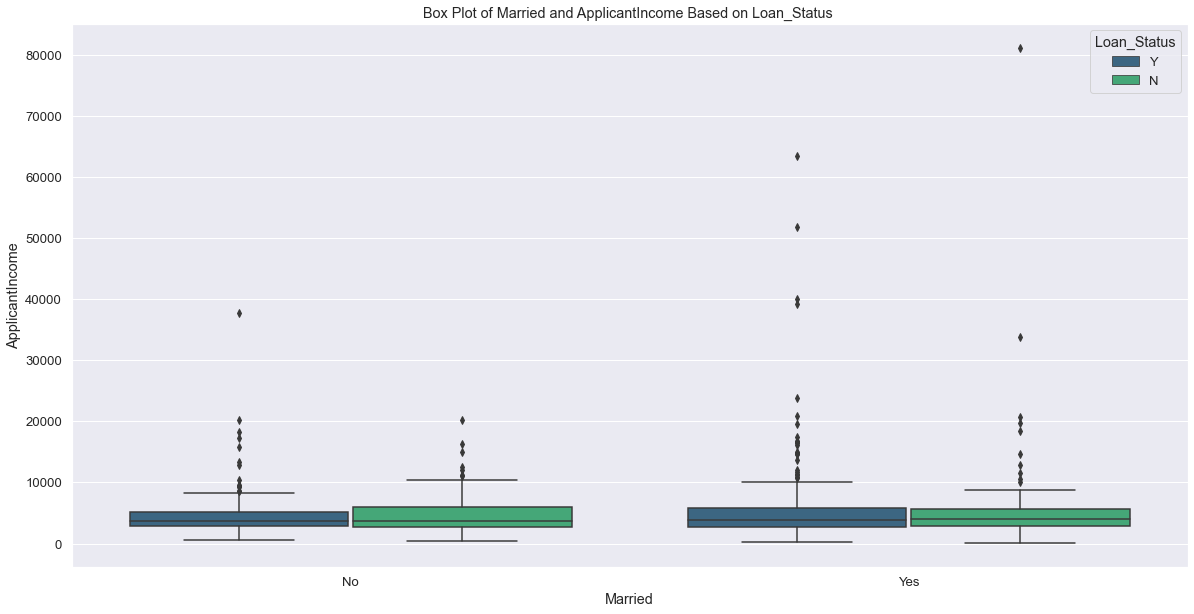

In [78]:
sns.boxplot( x = "Married" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Married and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Dependents and ApplicantIncome Based on Loan_Status ')

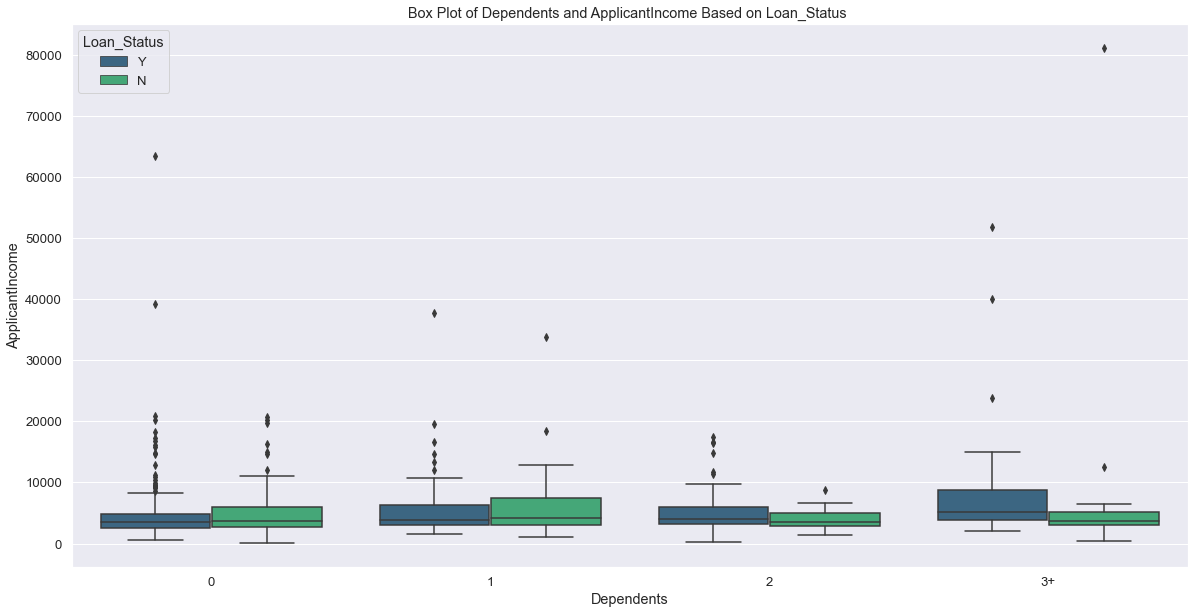

In [79]:
sns.boxplot( x = "Dependents" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Dependents and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Education and ApplicantIncome Based on Loan_Status ')

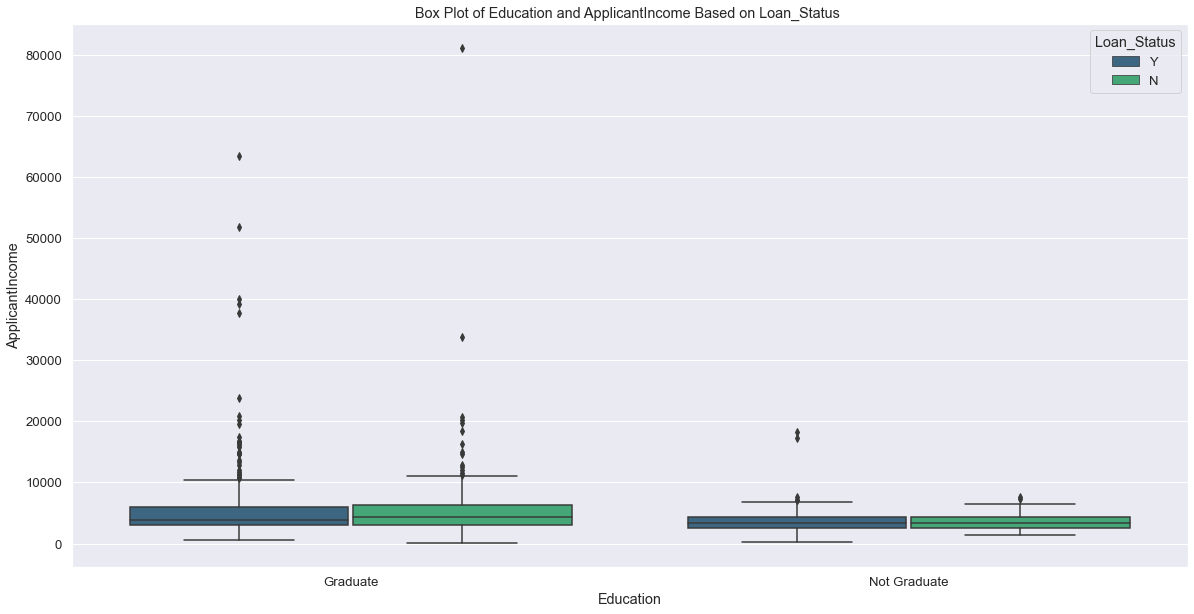

In [80]:
sns.boxplot( x = "Education" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Education and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Self_Employed and ApplicantIncome Based on Loan_Status ')

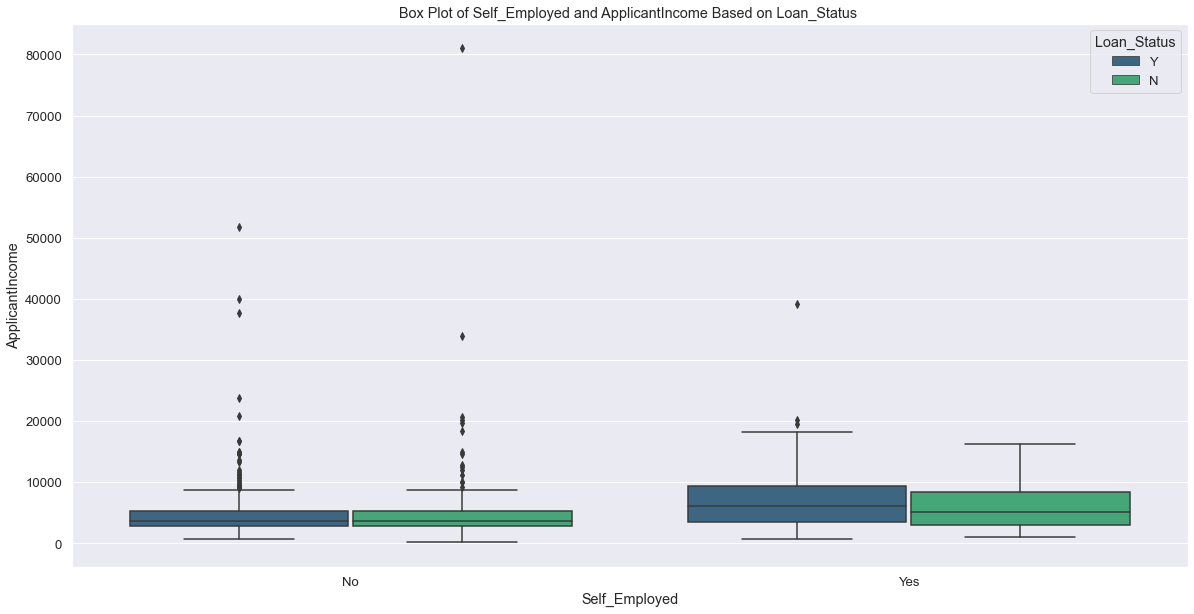

In [81]:
sns.boxplot( x = "Self_Employed" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Self_Employed and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Property_Area and ApplicantIncome Based on Loan_Status ')

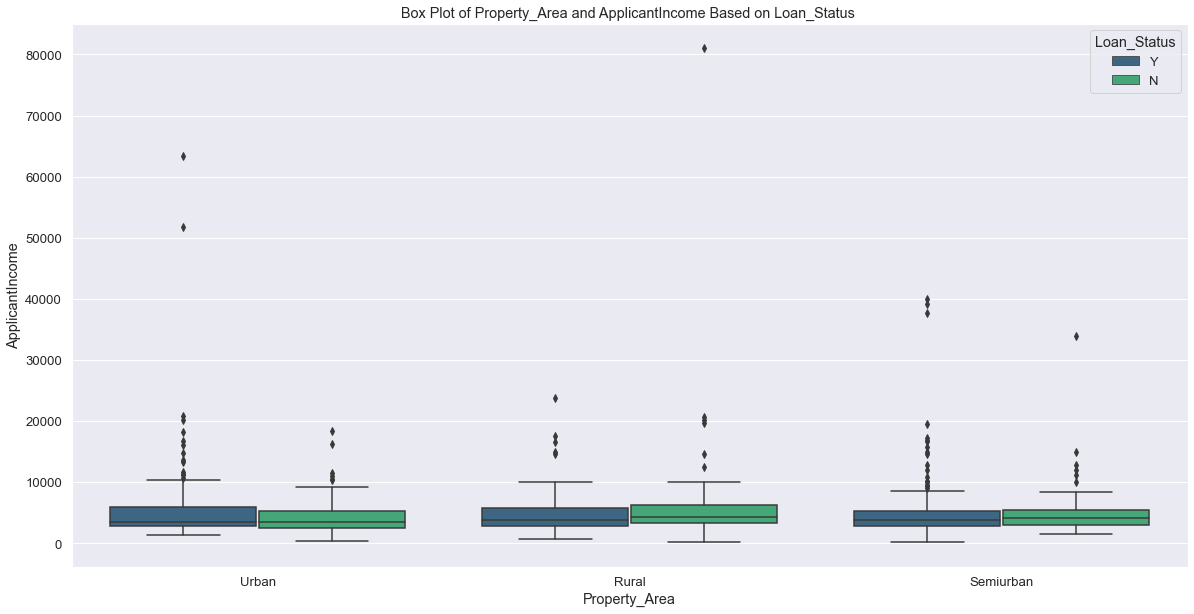

In [82]:
sns.boxplot( x = "Property_Area" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Property_Area and ApplicantIncome Based on Loan_Status ")

Text(0.5, 1.0, 'Box Plot of Loan_Status and ApplicantIncome Based on Loan_Status ')

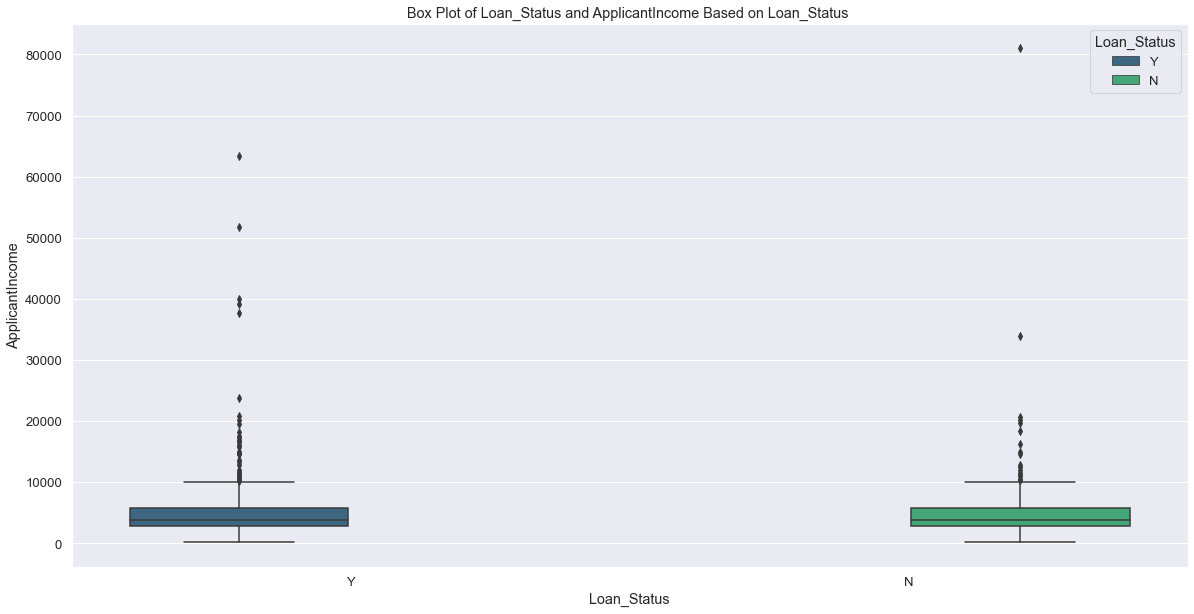

In [83]:
sns.boxplot( x = "Loan_Status" , y = "ApplicantIncome" , data = df ,hue = "Loan_Status" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Loan_Status and ApplicantIncome Based on Loan_Status ")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Count Plot of Gender  Based on Loan_Status ')

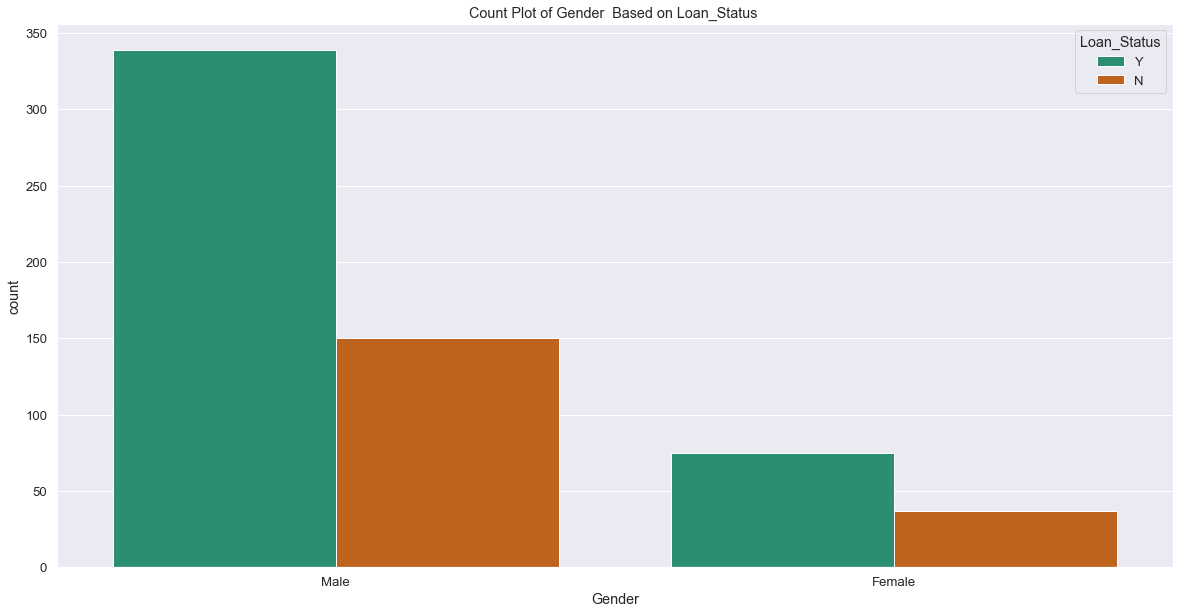

In [85]:
sns.countplot( x = "Gender"  , data = df ,hue="Loan_Status" , palette="Dark2")
plt.title("Count Plot of Gender  Based on Loan_Status ")

Text(0.5, 1.0, 'Count Plot of Married  Based on Loan_Status ')

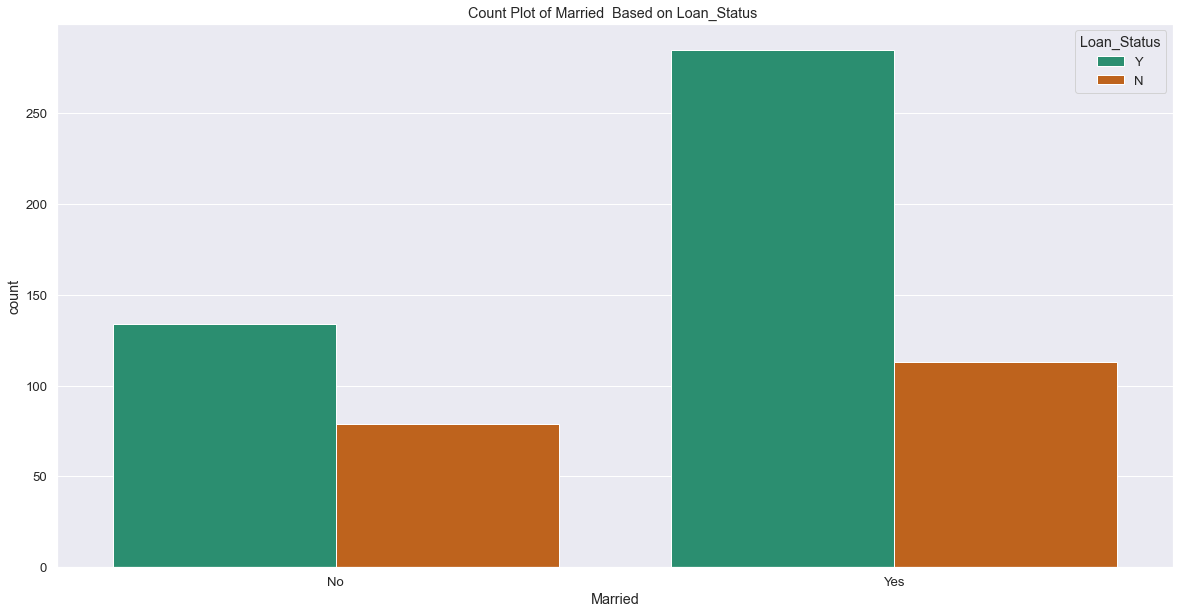

In [86]:
sns.countplot( x = "Married"  , data = df ,hue="Loan_Status" , palette="Dark2")
plt.title("Count Plot of Married  Based on Loan_Status ")

Text(0.5, 1.0, 'Count Plot of Dependents  Based on Loan_Status ')

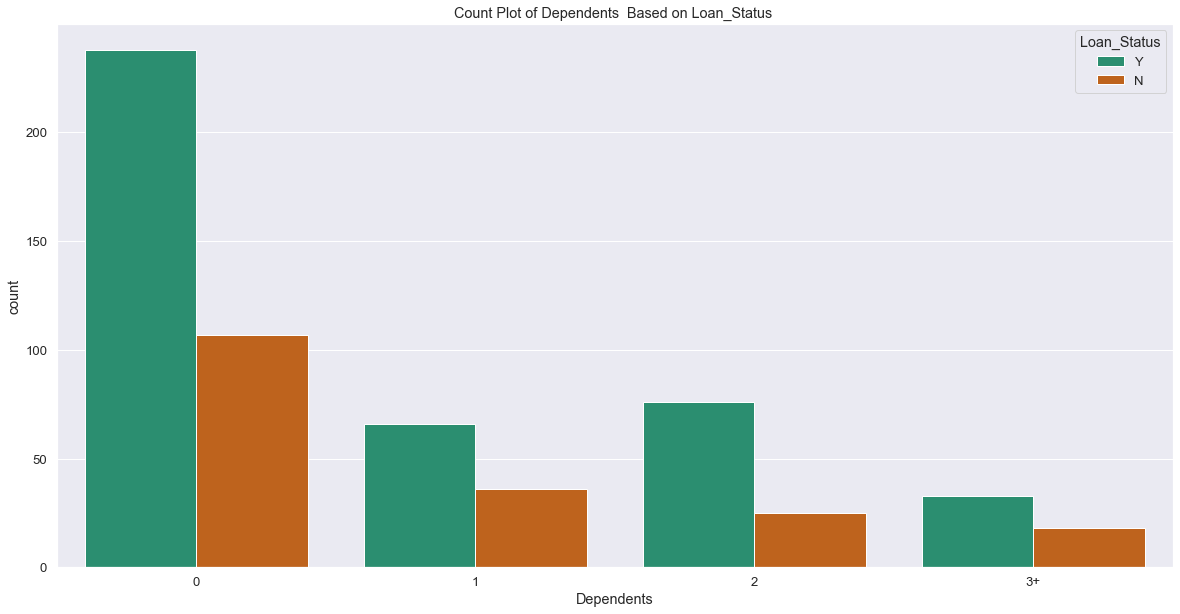

In [87]:
sns.countplot( x = "Dependents"  , data = df ,hue="Loan_Status" , palette="Dark2")
plt.title("Count Plot of Dependents  Based on Loan_Status ")

Text(0.5, 1.0, 'Count Plot of Education  Based on Loan_Status ')

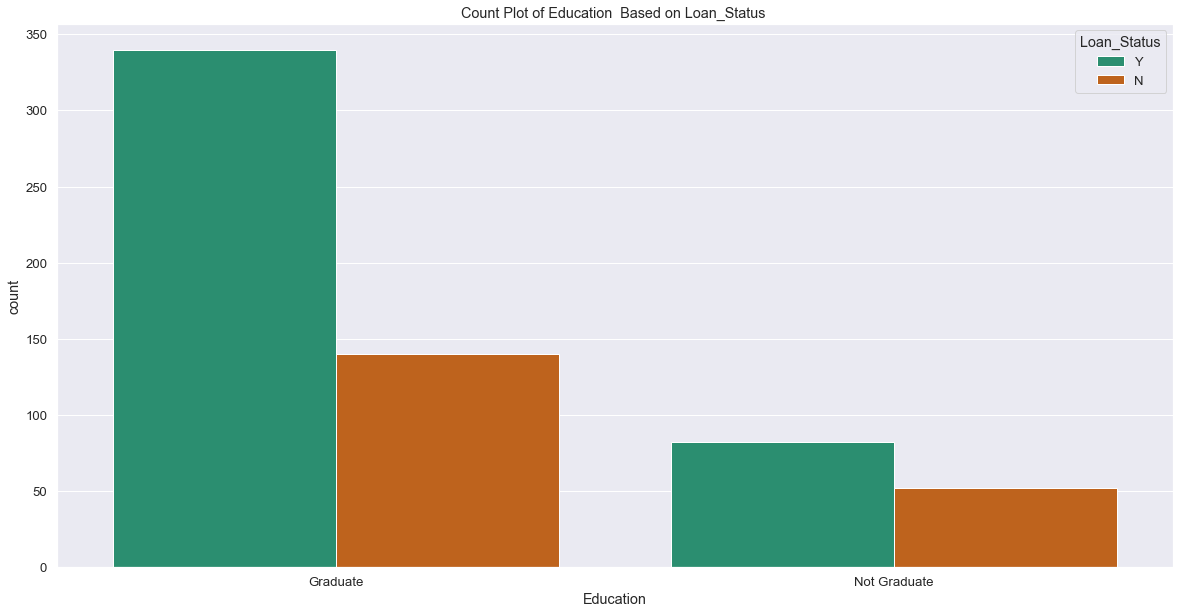

In [88]:
sns.countplot( x = "Education"  , data = df ,hue="Loan_Status" , palette="Dark2")
plt.title("Count Plot of Education  Based on Loan_Status ")

Text(0.5, 1.0, 'Count Plot of Self_Employed  Based on Loan_Status ')

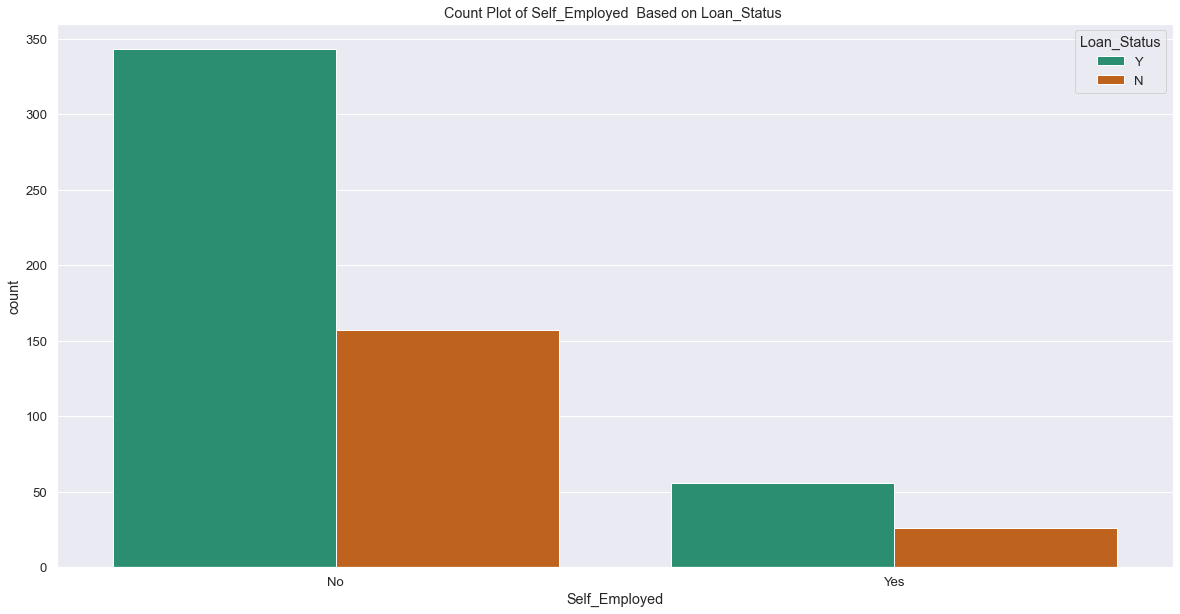

In [89]:
sns.countplot( x = "Self_Employed"  , data = df ,hue="Loan_Status" , palette="Dark2")
plt.title("Count Plot of Self_Employed  Based on Loan_Status ")

Text(0.5, 1.0, 'Count Plot of Property_Area  Based on Loan_Status ')

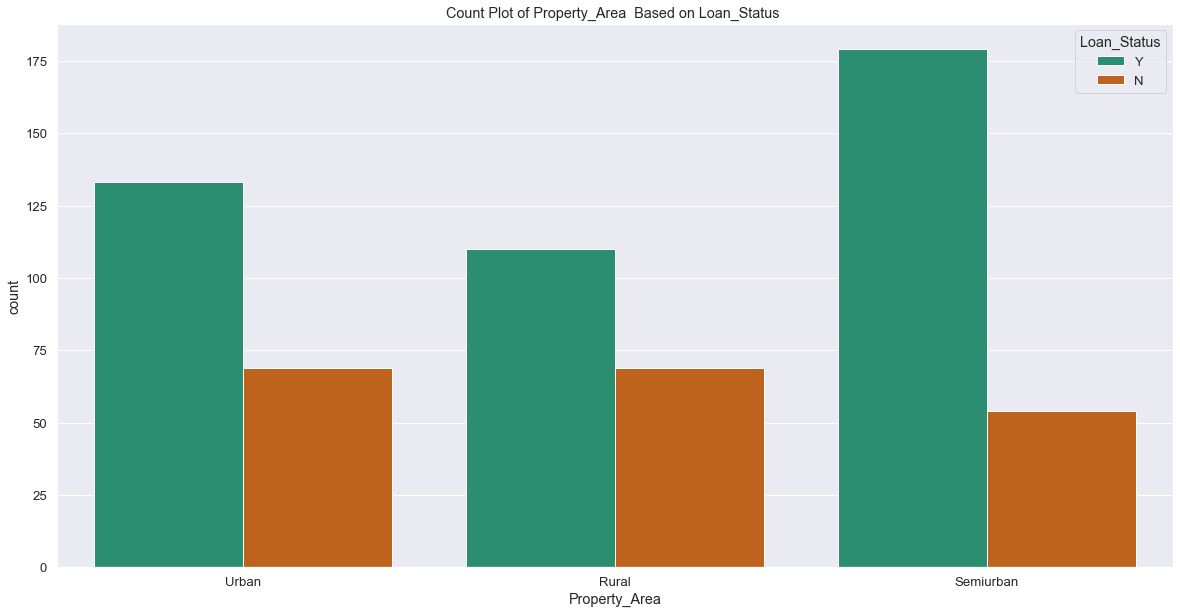

In [90]:
sns.countplot( x = "Property_Area"  , data = df ,hue="Loan_Status" , palette="Dark2")
plt.title("Count Plot of Property_Area  Based on Loan_Status ")

In [91]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Loan-Data_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
# To save report as html file
profile.to_file("Loan-Data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [93]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [94]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (Loan_ID)

The Unique Values of (Loan_ID) :: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP00127

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [95]:
# detect duplicated data ::

df.duplicated().sum()

0

In [96]:
# To confirm that ::
df.drop_duplicates(inplace=True)

In [97]:
# investigate data not include duplicaties records ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [98]:
# detect missing data values ::

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
Credit_History              50      0.081433
Self_Employed               32      0.052117
LoanAmount                  22      0.035831
Dependents                  15      0.024430
Loan_Amount_Term            14      0.022801
Gender                      13      0.021173
Married                      3      0.004886
Loan_ID                      0      0.000000
Education                    0      0.000000
ApplicantIncome              0      0.000000
CoapplicantIncome            0      0.000000
Property_Area                0      0.000000
Loan_Status                  0      0.000000

In [100]:
Num_feats = df.select_dtypes(include=["number"]).columns
Cat_feats = df.select_dtypes(include=["object"]).columns

In [101]:
for num in Num_feats :
    df[num].fillna(df[num].mean() , inplace=True)

In [102]:
for cat in Cat_feats :
    df[cat].fillna(df[cat].mode()[0] , inplace=True)

In [103]:
# investigate data not include Missing data

Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
Loan_ID                      0           0.0
Gender                       0           0.0
Married                      0           0.0
Dependents                   0           0.0
Education                    0           0.0
Self_Employed                0           0.0
ApplicantIncome              0           0.0
CoapplicantIncome            0           0.0
LoanAmount                   0           0.0
Loan_Amount_Term             0           0.0
Credit_History               0           0.0
Property_Area                0           0.0
Loan_Status                  0           0.0

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [104]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:ylabel='Loan_Amount_Term'>

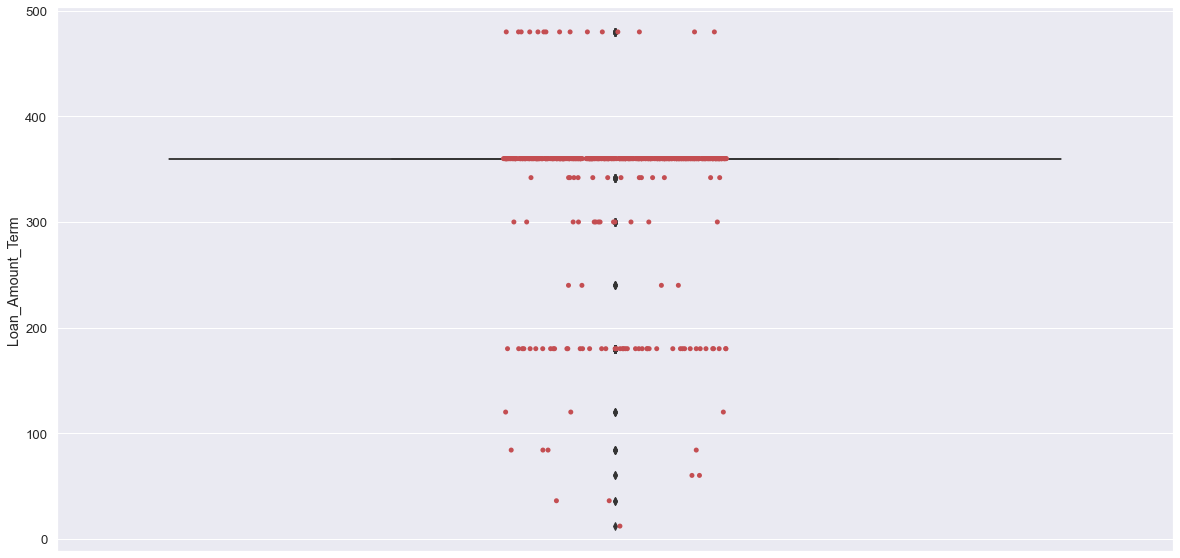

In [105]:
# detect outliers values in Loan_Amount_Term feature ::

sns.boxplot  (y = "Loan_Amount_Term" , data = df , palette="viridis")
sns.stripplot(y = "Loan_Amount_Term" , data = df , color = "r")

<AxesSubplot:ylabel='LoanAmount'>

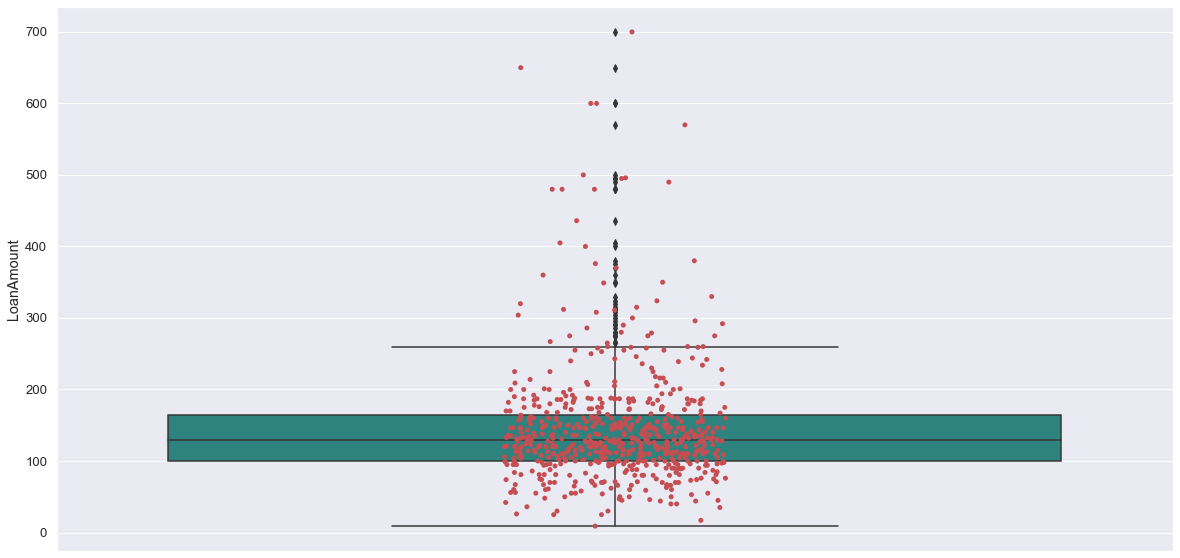

In [106]:
# detect outliers values in LoanAmount feature ::

sns.boxplot  (y = "LoanAmount" , data = df , palette="viridis")
sns.stripplot(y = "LoanAmount" , data = df , color = "r")

<AxesSubplot:ylabel='ApplicantIncome'>

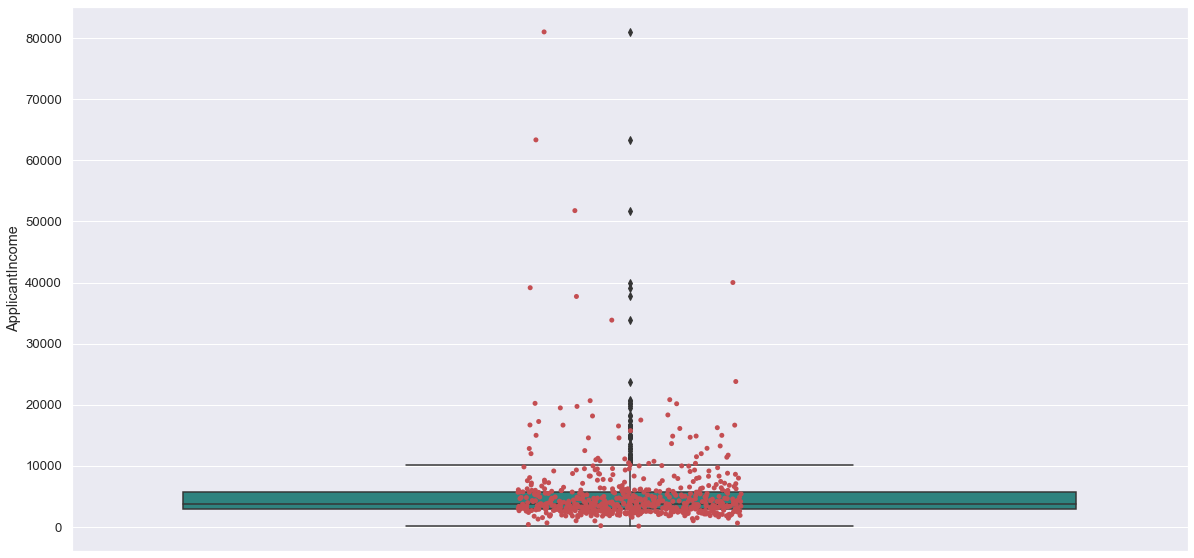

In [107]:
# detect outliers values in ApplicantIncome feature ::

sns.boxplot  (y = "ApplicantIncome" , data = df , palette="viridis")
sns.stripplot(y = "ApplicantIncome" , data = df , color = "r")

<AxesSubplot:ylabel='CoapplicantIncome'>

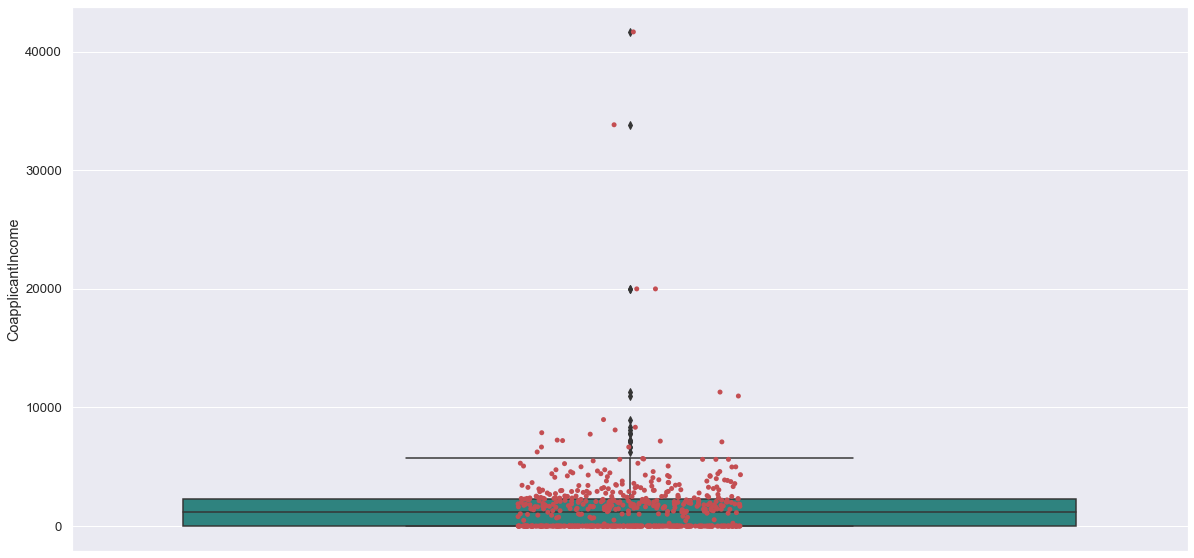

In [108]:
# detect outliers values in CoapplicantIncome feature ::

sns.boxplot  (y = "CoapplicantIncome" , data = df , palette="viridis")
sns.stripplot(y = "CoapplicantIncome" , data = df , color = "r")

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [109]:
#Convertin the predictor variable in a binary numeric variable
df["Gender"] = df["Gender"].apply(lambda x : 1 if x == "Male" else 0)
df["Married"] = df["Married"].apply(lambda x : 1 if x == "Yes" else 0)
df["Education"] = df["Education"].apply(lambda x : 1 if x == "Graduate" else 0)
df["Self_Employed"] = df["Self_Employed"].apply(lambda x : 1 if x == "Yes" else 0)
df["Loan_Status"] = df["Loan_Status"].apply(lambda x : 1 if x == "Y" else 0)


In [110]:
def depandes_map(d) :
    if d == "0" :
        return 0
    elif d == "1" :
        return 1
    elif d == "2" :
        return 2
    elif d == "3+" : 
        return 3
    
df["Dependents"] = df["Dependents"].apply(depandes_map)
# remove Loan_Id feature Becouse its one of usee;ess feature and not corelated with our target
df.drop(["Loan_ID"] , axis = 1 , inplace = True)

In [111]:
# creating dummy variables for categorical features
df = pd.get_dummies(df,drop_first=True)

In [112]:
df

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0  146.412162             360.0             1.0   
1               1508.0  128.000000             360.0             1.0   
2                  0.0   66.000000             360.0             1.0   
3               2358.0  120.000000             360.0             1.0   
4                  0.0  141.000000             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0   71.000000             360.0             1.0   
610                0.0   40.000000             180.0             1.0   
611              240.0  253.000000             360.0             1.0   
612                0.0  187.000000             360.0             1.0   
613                0.0  133.000000             360.0             0.0   

     Loan_Status  Property_Area_Semiurban  Property_Area_Urban  
0              1                        0                    1  
1              0                        0                    0  
2              1                        0                    1  
3              1                        0                    1  
4              1                        0                    1  
..           ...                      ...                  ...  
609            1                        0                    0  
610            1                        0                    0  
611            1                        0                    1  
612            1                        0                    1  
613            0                        1                    0  

[614 rows x 13 columns]

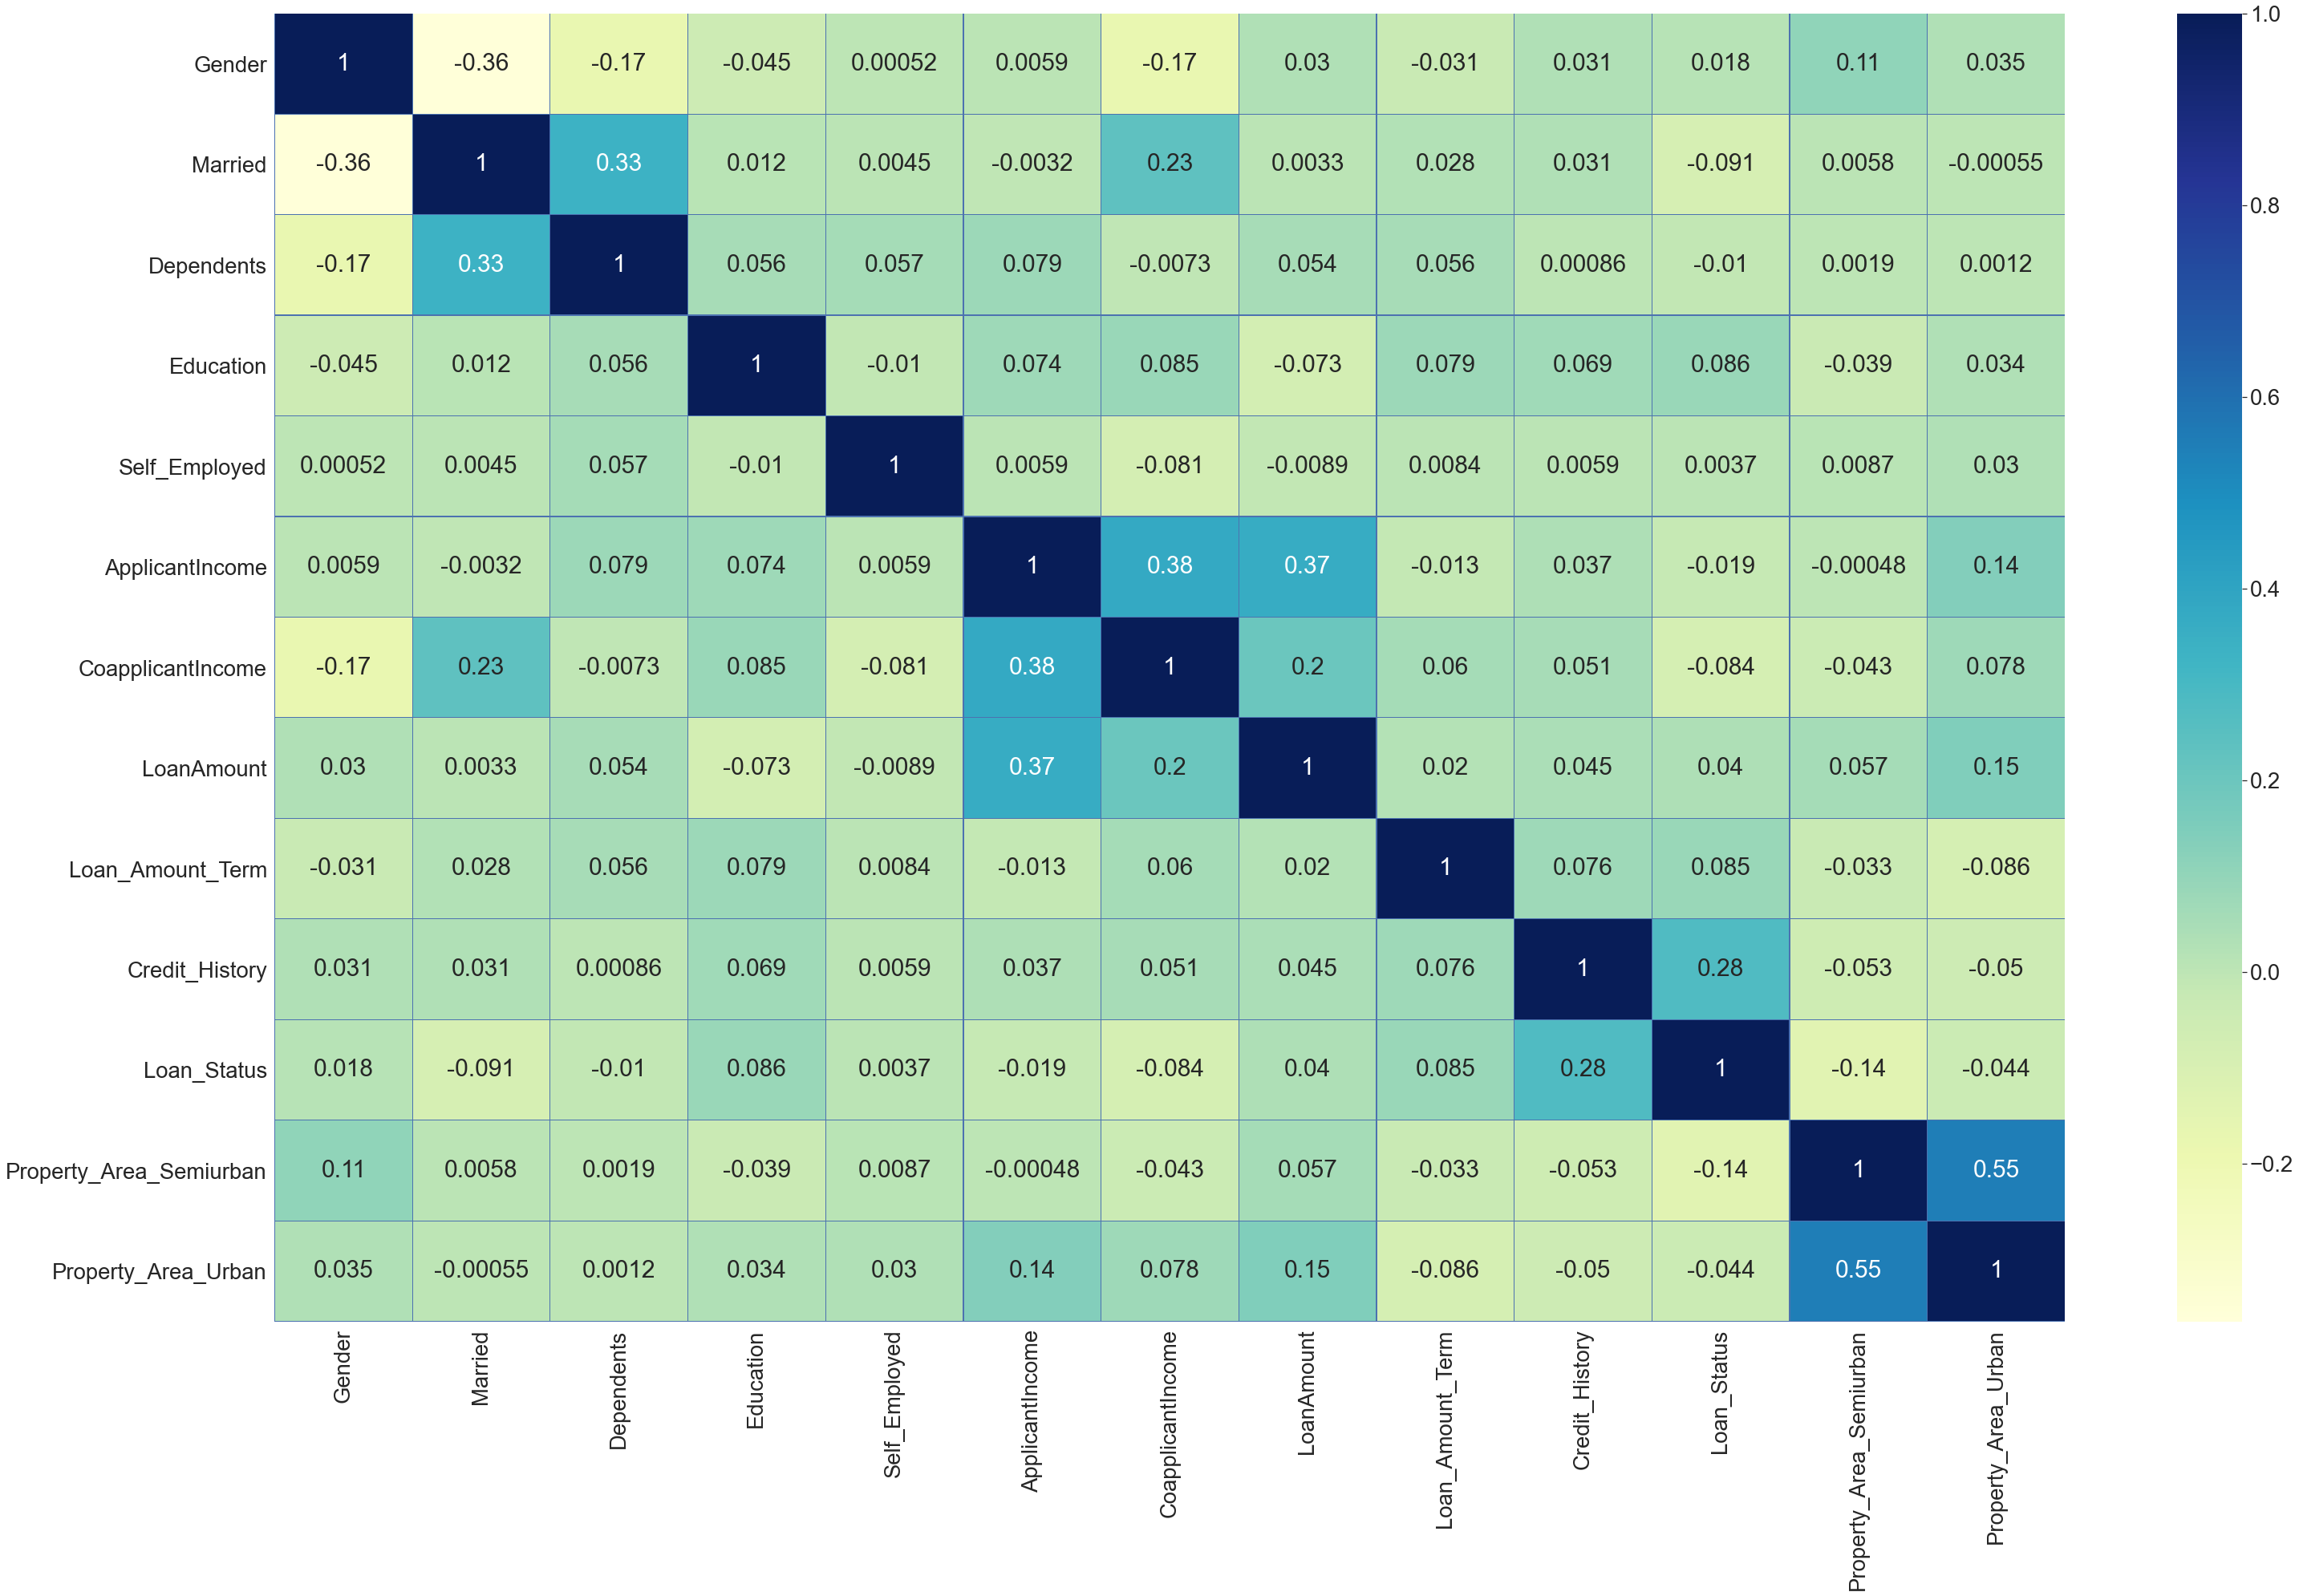

In [117]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=2.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

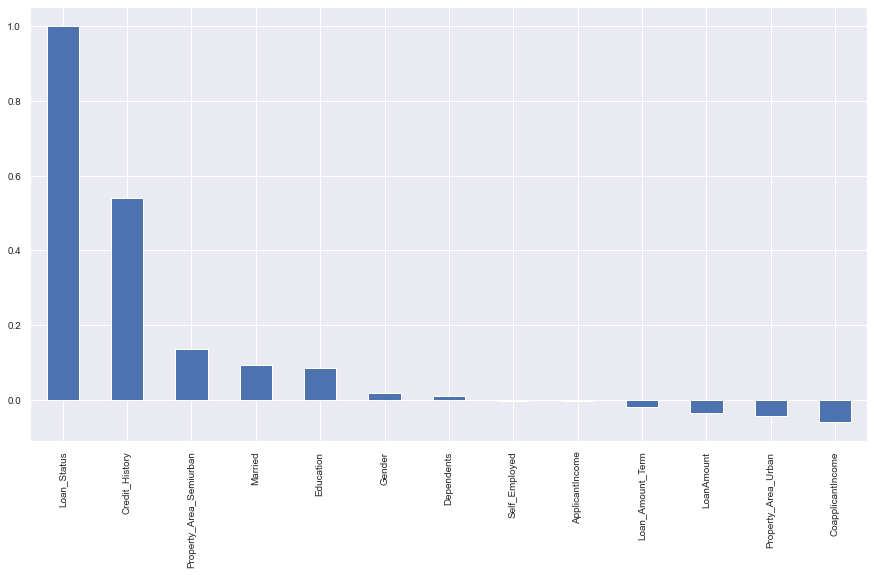

In [114]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=0.9)

plt.figure(figsize=(15,8))
df.corr()['Loan_Status'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

<p id = "Prepration">Data-Prepration</p>

In [118]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [119]:
# Split data into input and output data
x = df.drop("Loan_Status" , axis=1 )
y = df["Loan_Status"]

In [120]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [121]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    uint8  
 12  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(7), uint8(2)
memory usage: 58.8 KB


<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [123]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [124]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [125]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.8289205702647657
The Testing_Score :: 0.7479674796747967
The Accuracy_Scor :: 0.7479674796747967
The Con_Matrix ::
 [[20 31]
 [ 0 72]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.6666666666666666
The Accuracy_Scor :: 0.6666666666666666
The Con_Matrix ::
 [[28 23]
 [18 54]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.7154471544715447
The Accuracy_Scor :: 0.7154471544715447
The Con_Matrix ::
 [[21 30]
 [ 5 67]]
The Model :: XGB_Classifer
----------
[08:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 1.0
The Testing_Score :: 0.7073170731707317
The Accuracy_Scor :: 0.707317073170

* Select most efficient model with high Performance and accuracy

In [129]:
SVC_Model = SVC(kernel = "rbf")
SVC_Model.fit(x_train , y_train)
print(SVC_Model.score(x_train , y_train))
print(SVC_Model.score(x_test , y_test))
print("-" * 80)

0.8391038696537678
0.7479674796747967
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [130]:
SVC_Model.score(x_train , y_train)

0.8391038696537678

In [131]:
SVC_Model.score(x_test , y_test)

0.7479674796747967

In [132]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

0.7479674796747967

In [133]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[21, 30],
       [ 1, 71]], dtype=int64)

<AxesSubplot:>

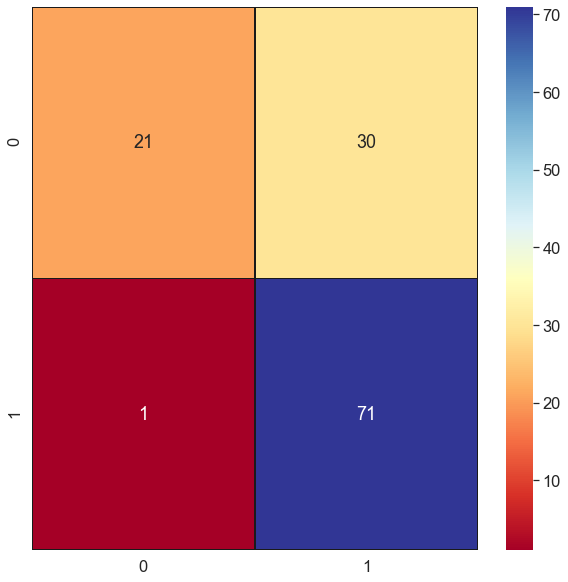

In [134]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [135]:
import joblib

In [136]:
scaler = joblib.dump(scaller , "scaler.h5")

In [137]:
Model = joblib.dump(SVC_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict Loan label.

In [148]:
df.head(20)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0        1        0           0          1              0             5849   
1        1        1           1          1              0             4583   
2        1        1           0          1              1             3000   
3        1        1           0          0              0             2583   
4        1        0           0          1              0             6000   
5        1        1           2          1              1             5417   
6        1        1           0          0              0             2333   
7        1        1           3          1              0             3036   
8        1        1           2          1              0             4006   
9        1        1           1          1              0            12841   
10       1        1           2          1              0             3200   
11       1        1           2          1              0             2500   
12       1        1           2          1              0             3073   
13       1        0           0          1              0             1853   
14       1        1           2          1              0             1299   
15       1        0           0          1              0             4950   
16       1        0           1          0              0             3596   
17       0        0           0          1              0             3510   
18       1        1           0          0              0             4887   
19       1        1           0          1              0             2600   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                 0.0  146.412162             360.0        1.000000   
1              1508.0  128.000000             360.0        1.000000   
2                 0.0   66.000000             360.0        1.000000   
3              2358.0  120.000000             360.0        1.000000   
4                 0.0  141.000000             360.0        1.000000   
5              4196.0  267.000000             360.0        1.000000   
6              1516.0   95.000000             360.0        1.000000   
7              2504.0  158.000000             360.0        0.000000   
8              1526.0  168.000000             360.0        1.000000   
9             10968.0  349.000000             360.0        1.000000   
10              700.0   70.000000             360.0        1.000000   
11             1840.0  109.000000             360.0        1.000000   
12             8106.0  200.000000             360.0        1.000000   
13             2840.0  114.000000             360.0        1.000000   
14             1086.0   17.000000             120.0        1.000000   
15                0.0  125.000000             360.0        1.000000   
16                0.0  100.000000             240.0        0.842199   
17                0.0   76.000000             360.0        0.000000   
18                0.0  133.000000             360.0        1.000000   
19             3500.0  115.000000             342.0        1.000000   

    Loan_Status  Property_Area_Semiurban  Property_Area_Urban  
0             1                        0                    1  
1             0                        0                    0  
2             1                        0                    1  
3             1                        0                    1  
4             1                        0                    1  
5             1                        0                    1  
6             1                        0                    1  
7             0                        1                    0  
8             1                        0                    1  
9             0                        1                    0  
10            1                        0                    1  
11            1                        0                    1  
12            1                        0 

In [139]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [140]:
len(x.columns)

12

In [142]:
custom_data = np.array([1 , 0 , 1 , 0 , 1 , 5849 , 1508 , 128.500 , 360 , 1 , 0 , 1])

In [143]:
custom_data.shape

(12,)

In [144]:
len(custom_data)

12

In [145]:
custom_data = scaller.transform([custom_data])
custom_data

array([[ 0.45429969, -1.40561644,  0.22471738, -1.91733943,  2.47304307,
         0.04079184, -0.03990707, -0.24135308,  0.28071421,  0.44458279,
        -0.81857683,  1.43831499]])

In [147]:
prediction = SVC_Model.predict(custom_data)
prediction

array([1], dtype=int64)